# <h1><center>DATA SCIENCE PROJECT</center></h1>

# CENSUS DATA CLEANING, ANALYSIS, VISUALIZATION AND INSIGHTS

# Importing Libraries

In [2]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import missingno as msno

In [3]:
#Read census csv file into pandas dataframe
df=pd.read_csv('census07-2.csv')

In [4]:
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Edwards Creek,Kyle,Davis,47.0,Head,Married,Male,Unemployed,None,Catholic
1,1,Edwards Creek,Alexandra,Davis,49.0,Wife,Married,Female,"Conservation officer, historic buildings",None,Catholic
2,1,Edwards Creek,Michael,Davis,20.0,Son,Single,Male,University Student,None,None
3,1,Edwards Creek,Malcolm,Davis,16.0,Son,NaN,Male,Student,None,NaN
4,2,Edwards Creek,Claire,Humphries,40.0,Head,Married,Female,"Engineer, manufacturing",None,Christian


# POPULATION DEMOGRAPHICS(pre cleaning, analysis, visualisation and insights)

In [5]:
for col in (df.columns):
    print(col)

House Number
Street
First Name
Surname
Age
Relationship to Head of House
Marital Status
Gender
Occupation
Infirmity
Religion


In [6]:
#Checking dublicate records
df.duplicated().sum()

0

In [7]:
#Showing number of null values in columns 
df.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2261
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2317
dtype: int64

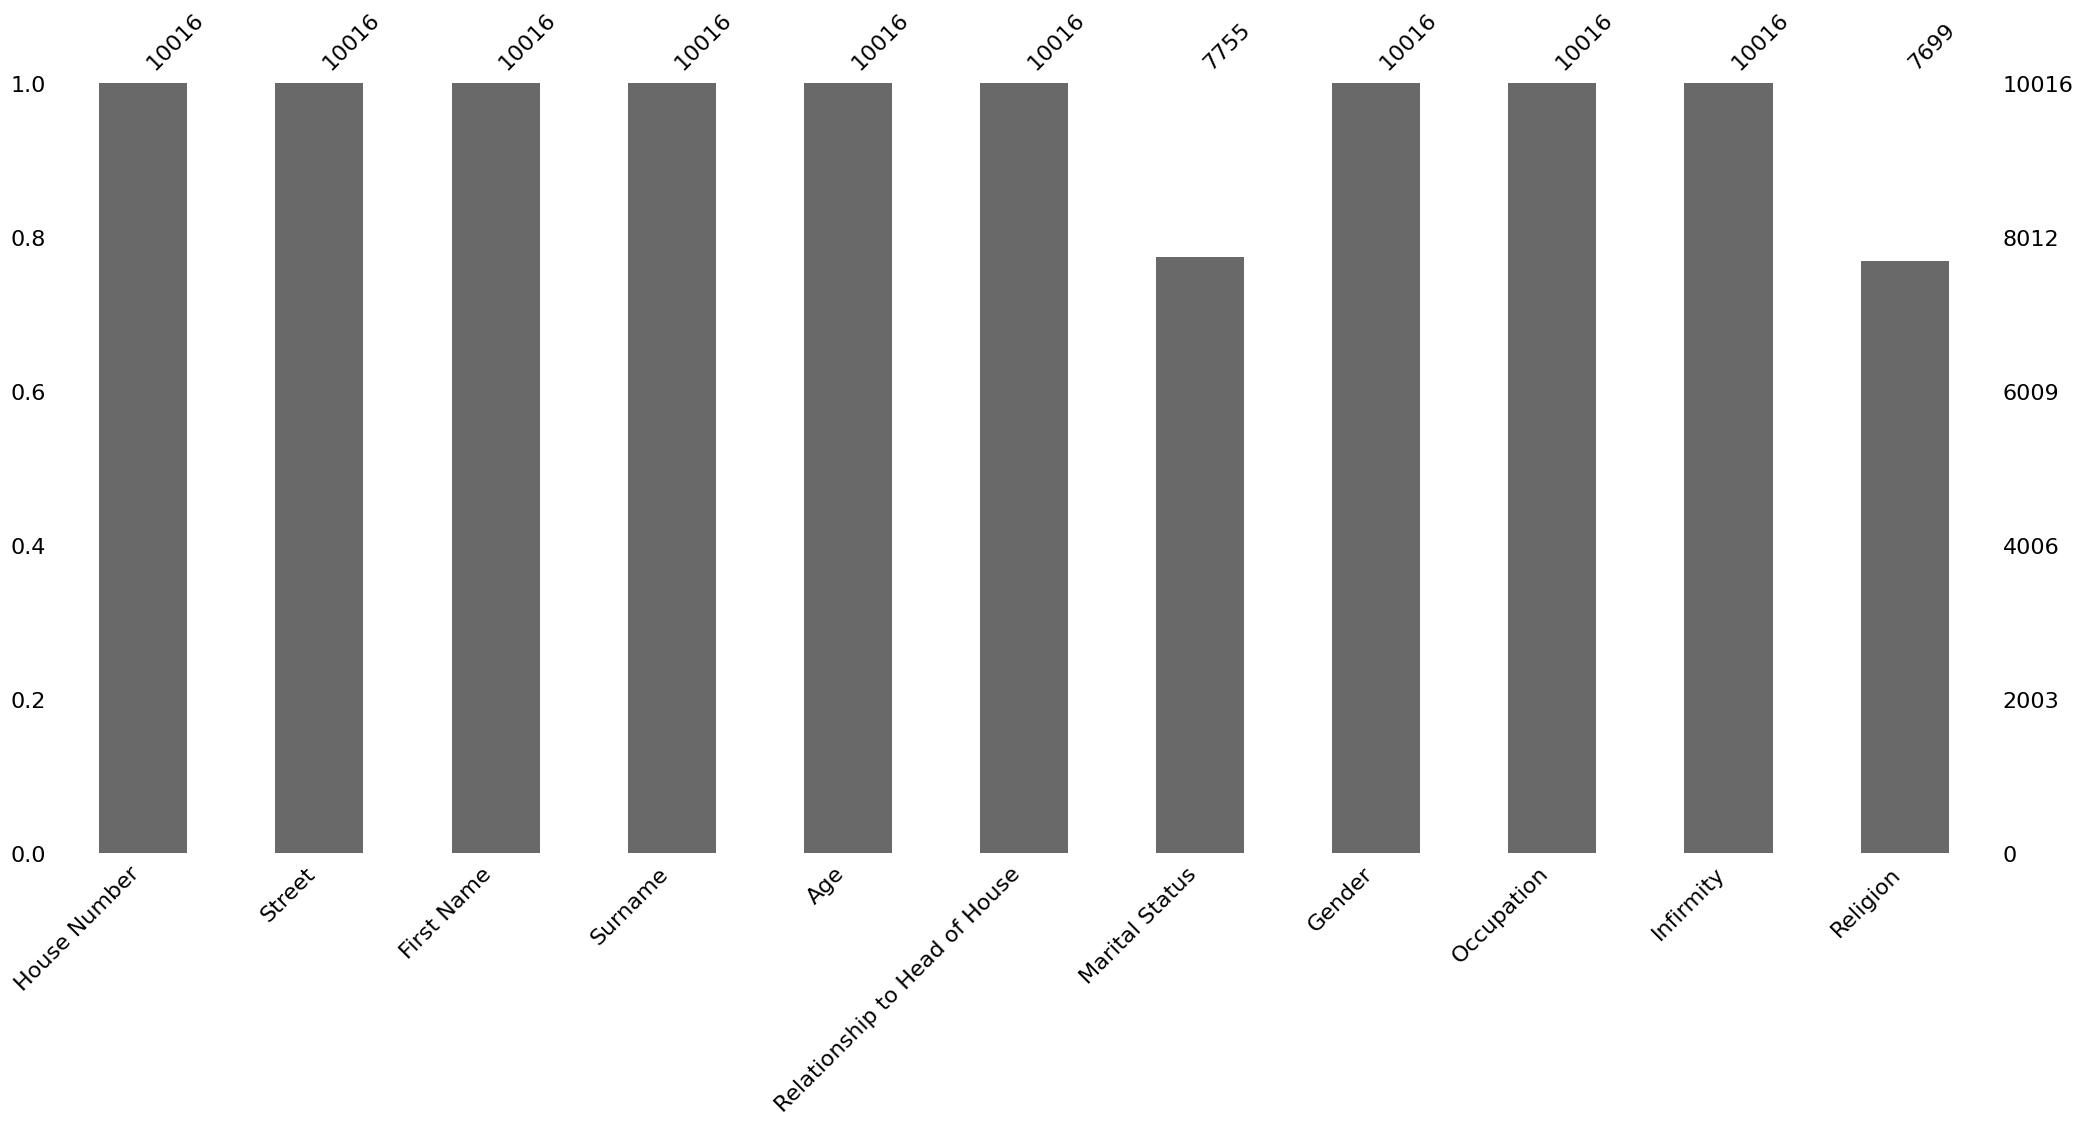

In [8]:
#Showing two columns marital status and religion Before cleaning data
missing_number_plot=msno.bar(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10016 entries, 0 to 10015
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House Number                   10016 non-null  int64  
 1   Street                         10016 non-null  object 
 2   First Name                     10016 non-null  object 
 3   Surname                        10016 non-null  object 
 4   Age                            10016 non-null  float64
 5   Relationship to Head of House  10016 non-null  object 
 6   Marital Status                 7755 non-null   object 
 7   Gender                         10016 non-null  object 
 8   Occupation                     10016 non-null  object 
 9   Infirmity                      10016 non-null  object 
 10  Religion                       7699 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 860.9+ KB


In [10]:
df.dtypes #checking column types

House Number                       int64
Street                            object
First Name                        object
Surname                           object
Age                              float64
Relationship to Head of House     object
Marital Status                    object
Gender                            object
Occupation                        object
Infirmity                         object
Religion                          object
dtype: object

# DATA CLEANING

# 1.1 Column "House Number"

In [11]:
df['House Number'].unique() #Cheacking values in a column house number

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [12]:
#Showing total number of missing values in Religion
df[df['House Number'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [13]:
df['House Number'].isnull().any() #Checking null values in column House Number

False

In [14]:
df['House Number'].isnull() #Checking null values record in column House Number

0        False
1        False
2        False
3        False
4        False
         ...  
10011    False
10012    False
10013    False
10014    False
10015    False
Name: House Number, Length: 10016, dtype: bool

# 1.2 Column "Street"

In [15]:
df['Street'].unique() #Cheacking unique values in a column Street Number

array(['Edwards Creek', 'Brooks Ferry', 'Testament Circle', 'Outer Lane',
       'Fowler Rapid', 'Carlisle Summit', 'October Crescent',
       'Sagittarius Drive', 'Newry Squares', 'Rice Drive', 'Baker Lane',
       'Williamson Brooks', 'Hyde Creek', 'Dennis Corners',
       'Hewitt Plains', 'Orchard Radial', 'Townsend Forge', 'Dale Street',
       'Nash Route', 'Glover Lodge', 'Libra Street', 'Smith Avenue',
       'Fleming Bridge', 'Holyrood Causeway', 'Copper Stravenue',
       'Howell Rapid', 'Page Glens', 'Queen Lane', 'Red Circle',
       'Toucan Street', 'Wayward Lane', 'Elliott Fords', 'Evans Avenue',
       'Goodluck Mall', 'Jones Drive', 'Robinson Stream',
       'Silver Crescent', 'Northumberland Islands', 'Wood Road',
       'Salmon Trail', 'Bell Spur', 'Wharf Lane', 'Reindeer Avenue',
       'Aquarius Place', 'Dove Harbor', 'Murphy Green', 'Preston Avenue',
       'Welch Lane', 'Manor Harbor', 'Salmon Crossroad', 'Mill Avenue',
       'Hicks Lane', 'Earlskip Street', 'Narw

In [16]:
df[df['Street'] == ' '] #Checking missing values in column Street Number

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [17]:
df[df['Street'].isnull()] #Checking null values in a column Street Number

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [18]:
df['Street'].isnull().any() #Checking null values in column Street Number

False

In [19]:
df['Street'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10011    False
10012    False
10013    False
10014    False
10015    False
Name: Street, Length: 10016, dtype: bool

In [20]:
# df.replace(np.nan, '0', inplace=True) for replacement with 0
# newdf=df.replace['Dee'], ['D'] ypu can also replace other values and this one creates a new data frame that has the replacement
#df['Column_Name']=['Column_Name'].replace('Dee', 'D') or this is to replace in the same dataframe for a given column
#df[df['Age'].isna()]


In [21]:
df['First Name'].unique() #Checking unique values in column First Name

array(['Kyle', 'Alexandra', 'Michael', 'Malcolm', 'Claire', 'Martyn',
       'Andrew', 'Rosie', 'Mohamed', 'Judith', 'Sheila', 'Keith',
       'Vincent', 'Sean', 'Kerry', 'Wayne', 'Leah', 'Olivia', 'Mandy',
       'Marie', 'Albert', 'Stuart', 'Sophie', 'Max', 'Terence', 'Tracey',
       'Samuel', 'Josephine', 'Abdul', 'Heather', 'Janet', 'David',
       'Lawrence', 'Shaun', 'Pauline', 'Rachael', 'Maurice', 'Lee',
       'Jayne', 'Elizabeth', 'Frank', 'Ryan', 'Gareth', 'Wendy',
       'Bradley', 'Geraldine', 'Graham', 'Michelle', 'Linda', 'Sam',
       'Christine', 'Rachel', 'Toby', 'Bernard', 'Lewis', 'Debra',
       'Ashley', 'Ellie', 'Robert', 'Amber', 'Megan', 'Sandra', 'Reece',
       'Irene', 'Dawn', 'Gregory', 'Jay', 'Joel', 'Lisa', 'Louise',
       'Lauren', 'Kathleen', 'Amelia', 'Frances', 'Joanne', 'Leslie',
       'Georgina', 'Kimberley', 'Hazel', 'Glen', 'Jane', 'Dennis',
       'Valerie', 'Kayleigh', 'Diane', 'Jennifer', 'Robin', 'Gerard',
       'Martin', 'Rita', 'Rhys', '

In [22]:
df[df['First Name'] == ' '] #Checking missing values in column First Name

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1359,115,Dennis Corners,,Anderson,34.0,None,Single,Male,Garment/textile technologist,None,Christian
2341,57,Nash Route,,Andrews,43.0,None,Single,Female,Child psychotherapist,None,None


In [23]:
df['First Name'].isnull().any() #Checking null values in column First Name

False

In [24]:
df['First Name'].isnull() #Checking null values in column First Name

0        False
1        False
2        False
3        False
4        False
         ...  
10011    False
10012    False
10013    False
10014    False
10015    False
Name: First Name, Length: 10016, dtype: bool

In [25]:
#filling missing values in column First Name
df[(df['House Number'] == 115) & (df['Street']== 'Dennis Corners')]
df.loc[(df['First Name'] == ' ') & (df['Gender'] == 'Male') & (df['House Number'] == 115) & (df['Street'] == 'Dennis Corners'), 'First Name'] = 'Anderson'
df[(df['House Number'] == 57) & (df['Street']== 'Nash Route')]
df.loc[(df['First Name'] == ' ') & (df['Gender'] == 'Female') & (df['House Number'] == 57) & (df['Street'] == 'Nash Route'), 'First Name'] = 'Andrews'

In [26]:
#Checking missing values again in column First Name to confirm, anymore missing value is still remaining
df[df['First Name'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


# 1.3 Column "Surname"

In [27]:
df['Surname'].unique() #Checking unique values again in column Surname

array(['Davis', 'Humphries', 'Hawkins', 'Hope', 'Bradley', 'Chandler',
       'Chamberlain', 'Pearson', 'Carr', 'Farmer', 'Hill', 'Allen',
       'Chapman', 'Quinn', 'Wallace', 'Parsons', 'Simpson', 'Hunt',
       'Rogers', 'Hewitt', 'Coates', 'Martin', 'Rowe', 'Smith', 'Moss',
       'Potter', 'Stevens', 'Connor', 'Barnett', 'McDonald', 'Stewart',
       'Kerr', 'Bibi', 'Brown', 'Begum', 'Briggs', 'Stephenson', 'Joyce',
       'Collins', "O'Brien", 'White', 'Coleman', 'Read', 'Wilson',
       'Hobbs', 'Campbell', 'Lee', 'Ahmed', 'Thompson', 'Freeman',
       'Heath', 'Mitchell', 'Ali', 'Jenkins', 'Barker', 'Watson', 'Patel',
       'Morris', 'Webster', 'Hamilton', 'Jones', 'Carter', 'Scott',
       'Dunn', 'Knowles', 'Power', 'Bell', 'Marsh', 'Newton',
       'Nicholls-Newton', 'Ellis', "O'Neill", 'Lewis', 'Slater', 'Mann',
       'Cole', 'Dawson', 'Dean', 'Khan', 'Summers', 'Gray', 'Payne',
       'Hughes', 'Fisher', 'Jackson', 'Willis', 'Young', 'Humphreys',
       'Nash', 'Kelly', 

In [28]:
df[df['Surname'] == ' '] #Checking missing values in column Surname

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4784,6,Salmon Trail,Angela,,11.0,Daughter,NaN,Female,Student,None,NaN
4984,12,Reindeer Avenue,Christopher,,7.0,Son,NaN,Male,Student,None,NaN
7712,44,Duchess Harbor,Mathew,,27.0,Son,Single,Male,Estate manager/land agent,None,Christian
9585,3,York Lane,Sylvia,,26.0,Wife,Married,Female,Broadcast journalist,None,None


In [29]:
#filling missing values in column Surname
df.loc[(df['Surname'] == ' ') & (df['Gender'] == 'Female') & (df['House Number'] == 6) & (df['Street'] == 'Salmon Trail'), 'Surname'] = 'Barnes'
df[(df['House Number'] == 12) & (df['Street']== 'Reindeer Avenue')]
df.loc[(df['Surname'] == ' ') & (df['Gender'] == 'Male') & (df['House Number'] == 12) & (df['Street'] == 'Reindeer Avenue'), 'Surname'] = 'Hughes'
df[(df['House Number'] ==44) & (df['Street']== 'Duchess Harbor')]
df.loc[(df['Surname'] == ' ') & (df['Gender'] == 'Male') & (df['House Number'] == 44) & (df['Street'] == 'Duchess Harbor'), 'Surname'] = 'Taylor'
df[(df['House Number'] == 3) & (df['Street']== 'York Lane')]
df.loc[(df['Surname'] == ' ') & (df['Gender'] == 'Female') & (df['House Number'] == 3) & (df['Street'] == 'York Lane'), 'Surname'] = 'Glover'
df[(df['House Number'] == 16) & (df['Street']== 'Johnston Manors')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8643,16,Johnston Manors,Jacqueline,Thompson,65.0,Head,Married,Female,Unemployed,None,Christian
8644,16,Johnston Manors,Mohammad,Thompson,68.0,Husband,Married,Male,"Retired Engineer, chemical",None,Christian
8645,16,Johnston Manors,Antony,Thompson,36.0,Son,Single,Male,Quality manager,None,Christian
8646,16,Johnston Manors,Stacey,Thompson,29.0,Daughter,,Female,Planning and development surveyor,None,None
8647,16,Johnston Manors,Luke,Thompson,26.0,Son,Single,Male,Unemployed,None,Christian
8648,16,Johnston Manors,Jeffrey,Thompson,23.0,Son,Single,Male,Unemployed,None,Christian
8649,16,Johnston Manors,Marilyn,Thompson,19.0,Daughter,Divorced,Female,University Student,None,Christian


In [30]:
#Checking missing values again in column Surname to confirm, anymore missing value is still remaining
df[df['Surname'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [31]:
#Checking null values in column Surname
df[df['Street'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [32]:
df['Street'].isnull().any() #Checking null values in column Surname

False

In [33]:
df['Street'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10011    False
10012    False
10013    False
10014    False
10015    False
Name: Street, Length: 10016, dtype: bool

# 1.4 Column "Age"

In [34]:
#Checking unique values in column Age
df['Age'].unique()

array([ 47.        ,  49.        ,  20.        ,  16.        ,
        40.        ,  42.        ,   9.        ,  41.        ,
        23.        ,  43.        ,  15.        ,  56.        ,
        35.        ,  58.        ,  55.        ,  24.        ,
        22.        ,  46.        ,  48.        ,  14.        ,
        10.        ,   4.        ,  44.        ,  17.        ,
         6.        ,  36.        ,  11.        ,  53.        ,
        21.        ,  13.        ,  25.        ,  32.        ,
         7.        ,   3.        ,   0.        ,  37.        ,
        75.        ,  77.        ,  39.        ,   2.        ,
         1.        ,  45.        ,  51.        ,  72.        ,
        64.        ,  27.        ,  50.        ,  34.        ,
        33.        ,  59.        ,  30.        ,  29.        ,
        38.        ,  52.        ,  12.        ,   5.        ,
        54.        ,  57.        ,  19.        ,   8.        ,
        88.        ,  18.        ,  65.        ,  83.  

In [35]:
df['Age']=df['Age'].astype(int)

In [36]:
#rounding off floating values in column Age to zero decimal place
df['Age']=round(df['Age'])

In [37]:
#Checking unique values in column Age
df['Age'].unique()

array([ 47,  49,  20,  16,  40,  42,   9,  41,  23,  43,  15,  56,  35,
        58,  55,  24,  22,  46,  48,  14,  10,   4,  44,  17,   6,  36,
        11,  53,  21,  13,  25,  32,   7,   3,   0,  37,  75,  77,  39,
         2,   1,  45,  51,  72,  64,  27,  50,  34,  33,  59,  30,  29,
        38,  52,  12,   5,  54,  57,  19,   8,  88,  18,  65,  83,  82,
        26,  78,  31,  60,  62,  63,  87,  69,  28,  79,  67,  81,  74,
        61,  85,  66,  73,  96,  86,  71,  92,  94, 101, 102,  76,  70,
        80,  89, 100, 104,  68,  98,  99,  93,  84,  90,  91,  95,  97,
       103, 105, 107])

In [38]:
#Checking missing values in column Age
df[df['Age'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [39]:
#sum missing values in column Age
df[df['Age'] == ' '].sum()

House Number                     0.0
Street                           0.0
First Name                       0.0
Surname                          0.0
Age                              0.0
Relationship to Head of House    0.0
Marital Status                   0.0
Gender                           0.0
Occupation                       0.0
Infirmity                        0.0
Religion                         0.0
dtype: float64

In [40]:
#sum null values in column Age
df[df['Age'].isnull()].sum()

House Number                     0.0
Street                           0.0
First Name                       0.0
Surname                          0.0
Age                              0.0
Relationship to Head of House    0.0
Marital Status                   0.0
Gender                           0.0
Occupation                       0.0
Infirmity                        0.0
Religion                         0.0
dtype: float64

In [41]:
#Checking null values in column Age, if any more null value in this column is still remaining
df['Age'].isnull().any()

False

# 1.5 Column "Relationship to Head of House"

In [42]:
#Checking unqiue values in a column
df['Relationship to Head of House'].unique()

array(['Head', 'Wife', 'Son', 'Husband', 'Adopted Son', 'Daughter',
       'None', 'Adopted Daughter', 'Neice', 'Nephew', 'Partner', 'Lodger',
       'Grandson', 'Cousin', 'Visitor', 'Granddaughter', 'Sibling',
       'Step-Son', 'Step-Daughter', ' ', 'Adopted Granddaughter'],
      dtype=object)

In [43]:
#counting all values of all relationships in a column
df['Relationship to Head of House'].value_counts()

Head                     3878
Daughter                 1604
Son                      1584
Husband                  1013
None                      597
Wife                      418
Partner                   284
Lodger                    268
Grandson                   84
Granddaughter              78
Sibling                    42
Cousin                     37
Step-Son                   24
Neice                      22
Visitor                    22
Adopted Daughter           15
Nephew                     15
Adopted Son                15
Step-Daughter              14
                            1
Adopted Granddaughter       1
Name: Relationship to Head of House, dtype: int64

In [44]:
#Checking missing values in a column
df[df['Relationship to Head of House'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3013,24,Smith Avenue,Ronald,Price,2,,NaN,Male,Child,None,NaN


In [45]:
#checking family tree for a missing value in a column
df[(df['House Number'] == 24) & (df['Street']== 'Smith Avenue') & (df['Surname']== 'Price')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3011,24,Smith Avenue,Philip,Price,42,Head,Divorced,Male,Environmental health practitioner,None,Catholic
3012,24,Smith Avenue,Arthur,Price,6,Son,NaN,Male,Student,None,NaN
3013,24,Smith Avenue,Ronald,Price,2,,NaN,Male,Child,None,NaN


In [46]:
#filling missing values in a column
df.loc[(df['Relationship to Head of House'] == ' ') & (df['Age'] < 18) & (df['Gender'] == 'Male') & (df['Surname'] == 'Price'), 'Relationship to Head of House'] = 'Son'

In [47]:
#Checking relationship of 'Head' values in a column for children under 18 years
df[(df['Relationship to Head of House'] == 'Head') & (df['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
395,11,October Crescent,Katie,Knowles,16,Head,Married,Female,Student,None,NaN
3180,48,Smith Avenue,Jasmine,Williams,17,Head,Single,Female,Student,None,NaN
4994,15,Reindeer Avenue,Brenda,Osborne,16,Head,Married,Female,Student,None,NaN
6655,89,Chan Port,Stewart,Morris,17,Head,Married,Male,Student,None,NaN


In [48]:
#Checking data for specific incorrect relationship value in a column "Relationship to Head of House"
df[(df['House Number'] == 11) & (df['Street']== 'October Crescent')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
395,11,October Crescent,Katie,Knowles,16,Head,Married,Female,Student,None,NaN
396,11,October Crescent,Louis,Knowles,19,Husband,Married,Male,"Embryologist, clinical",None,NaN
397,11,October Crescent,Harriet,Knowles,0,Daughter,NaN,Female,Child,None,NaN
398,11,October Crescent,Lucy,Nicholson,24,Lodger,Widowed,Female,Speech and language therapist,None,Methodist
399,11,October Crescent,Graham,Peters,53,Lodger,Single,Male,Armed forces technical officer,None,Catholic
400,11,October Crescent,Hugh,King,21,Sibling,Single,Male,University Student,None,Methodist


In [49]:
#Checking data for specific incorrect relationship value in a column "Relationship to Head of House"
df[(df['House Number'] == 89) & (df['Street']== 'Chan Port')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6655,89,Chan Port,Stewart,Morris,17,Head,Married,Male,Student,None,NaN
6656,89,Chan Port,Linda,Morris,20,Wife,Married,Female,University Student,None,NaN
6657,89,Chan Port,Adrian,Morris,3,Adopted Son,NaN,Male,Child,None,NaN


In [50]:
#Checking data for specific incorrect relationship value in a column "Relationship to Head of House"
df[(df['House Number'] == 15) & (df['Street']== 'Reindeer Avenue')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4994,15,Reindeer Avenue,Brenda,Osborne,16,Head,Married,Female,Student,None,NaN
4995,15,Reindeer Avenue,Colin,Osborne,19,Husband,Married,Male,University Student,None,None
4996,15,Reindeer Avenue,Simon,Osborne,0,Son,NaN,Male,Child,None,NaN
4997,15,Reindeer Avenue,Howard,Roberts,41,Sibling,Divorced,Male,Chief Marketing Officer,None,Catholic


In [51]:
#Checking data for specific incorrect relationship value in a column "Relationship to Head of House"
df[(df['House Number'] == 48) & (df['Street']== 'Smith Avenue')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3180,48,Smith Avenue,Jasmine,Williams,17,Head,Single,Female,Student,None,NaN
3181,48,Smith Avenue,Tom,Williams,0,Son,NaN,Male,Child,None,NaN
3182,48,Smith Avenue,Samantha,Byrne,35,Lodger,Single,Female,"Buyer, industrial",None,Catholic
3183,48,Smith Avenue,Rachael,Davies,35,Lodger,Divorced,Female,Broadcast engineer,None,None
3184,48,Smith Avenue,Rosemary,Hughes,19,Lodger,Single,Female,University Student,None,None


In [52]:
#Checking data for specific incorrect relationship value in a column "Relationship to Head of House"
df.loc[(df['Relationship to Head of House'] == 'Head') & (df['House Number'] == 11) & (df['Street']== 'October Crescent') & (df['First Name'] == 'Katie') & (df['Gender'] == 'Female'), 'Relationship to Head of House'] = 'Daughter'
df.loc[(df['Relationship to Head of House'] == 'Head') & (df['House Number'] == 15) & (df['Street']== 'Reindeer Avenue') & (df['First Name'] == 'Brenda') & (df['Gender'] == 'Female'), 'Relationship to Head of House'] = 'Daughter'
df.loc[(df['Relationship to Head of House'] == 'Head') & (df['House Number'] == 48) & (df['Street']== 'Smith Avenue') & (df['First Name'] == 'Jasmine') & (df['Gender'] == 'Female'), 'Relationship to Head of House'] = 'Daughter'
df.loc[(df['Relationship to Head of House'] == 'Head') & (df['House Number'] == 89) & (df['Street']== 'Chan Port') & (df['First Name'] == 'Stewart') & (df['Gender'] == 'Male'), 'Relationship to Head of House'] = 'Son'

In [53]:
#sum all missing value in a column "Relationship to Head of House"

df[df['Relationship to Head of House'] == ' '].sum()

House Number                     0.0
Street                           0.0
First Name                       0.0
Surname                          0.0
Age                              0.0
Relationship to Head of House    0.0
Marital Status                   0.0
Gender                           0.0
Occupation                       0.0
Infirmity                        0.0
Religion                         0.0
dtype: float64

In [54]:
#counting all values in a column "Relationship to Head of House"
df['Relationship to Head of House'].value_counts()

Head                     3874
Daughter                 1607
Son                      1586
Husband                  1013
None                      597
Wife                      418
Partner                   284
Lodger                    268
Grandson                   84
Granddaughter              78
Sibling                    42
Cousin                     37
Step-Son                   24
Neice                      22
Visitor                    22
Adopted Daughter           15
Nephew                     15
Adopted Son                15
Step-Daughter              14
Adopted Granddaughter       1
Name: Relationship to Head of House, dtype: int64

# 1.6 Column "Marital Status"

In [55]:
#Checking unique values in a column
df['Marital Status'].unique()

array(['Married', 'Single', nan, 'Divorced', 'Widowed', ' '], dtype=object)

In [56]:
#Checking missing values in a column
df[df['Marital Status'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8646,16,Johnston Manors,Stacey,Thompson,29,Daughter,,Female,Planning and development surveyor,None,None


In [57]:
#Checking specific value in a column through htracing information from House Number and Street
df[(df['House Number'] == 16) & (df['Street']== 'Johnston Manors')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8643,16,Johnston Manors,Jacqueline,Thompson,65,Head,Married,Female,Unemployed,None,Christian
8644,16,Johnston Manors,Mohammad,Thompson,68,Husband,Married,Male,"Retired Engineer, chemical",None,Christian
8645,16,Johnston Manors,Antony,Thompson,36,Son,Single,Male,Quality manager,None,Christian
8646,16,Johnston Manors,Stacey,Thompson,29,Daughter,,Female,Planning and development surveyor,None,None
8647,16,Johnston Manors,Luke,Thompson,26,Son,Single,Male,Unemployed,None,Christian
8648,16,Johnston Manors,Jeffrey,Thompson,23,Son,Single,Male,Unemployed,None,Christian
8649,16,Johnston Manors,Marilyn,Thompson,19,Daughter,Divorced,Female,University Student,None,Christian


In [58]:
#Checking specific value in a column through htracing information from House Number and Street
df[(df['House Number'] == 16) & (df['Street']== 'Johnston Manors') & (df['Surname']=='Thompson')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8643,16,Johnston Manors,Jacqueline,Thompson,65,Head,Married,Female,Unemployed,None,Christian
8644,16,Johnston Manors,Mohammad,Thompson,68,Husband,Married,Male,"Retired Engineer, chemical",None,Christian
8645,16,Johnston Manors,Antony,Thompson,36,Son,Single,Male,Quality manager,None,Christian
8646,16,Johnston Manors,Stacey,Thompson,29,Daughter,,Female,Planning and development surveyor,None,None
8647,16,Johnston Manors,Luke,Thompson,26,Son,Single,Male,Unemployed,None,Christian
8648,16,Johnston Manors,Jeffrey,Thompson,23,Son,Single,Male,Unemployed,None,Christian
8649,16,Johnston Manors,Marilyn,Thompson,19,Daughter,Divorced,Female,University Student,None,Christian


In [59]:
#counting values in a column
df['Marital Status'].value_counts()

Single      3433
Married     2872
Divorced     963
Widowed      486
               1
Name: Marital Status, dtype: int64

In [60]:
#Checking null values in a column
df[df['Marital Status'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3,1,Edwards Creek,Malcolm,Davis,16,Son,NaN,Male,Student,None,NaN
6,2,Edwards Creek,Andrew,Humphries,9,Son,NaN,Male,Student,None,NaN
12,4,Edwards Creek,Vincent,Hope,15,Son,NaN,Male,Student,None,NaN
24,8,Edwards Creek,Terence,Allen,14,Son,NaN,Male,Student,None,NaN
25,8,Edwards Creek,Tracey,Allen,10,Adopted Daughter,NaN,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9983,1,Holmes Haven,Natasha,Harrison,15,Daughter,NaN,Female,Student,None,NaN
9986,1,Hussain Institute,Malcolm,Gordon,8,Son,NaN,Male,Student,None,NaN
9987,1,Hussain Institute,Joshua,Gordon,4,Son,NaN,Male,Child,None,NaN
9988,1,Hussain Institute,Naomi,Gordon,2,Daughter,NaN,Female,Child,None,NaN


In [61]:
#Checking null values in a column
df['Marital Status'].isnull()

0        False
1        False
2        False
3         True
4        False
         ...  
10011    False
10012    False
10013     True
10014    False
10015    False
Name: Marital Status, Length: 10016, dtype: bool

In [62]:
#Checking null values in a column
df['Marital Status'].isnull().any()

True

In [63]:
#Checking null values in a column for those under an age of 18
df[(df['Marital Status'].isnull()) & (df['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3,1,Edwards Creek,Malcolm,Davis,16,Son,NaN,Male,Student,None,NaN
6,2,Edwards Creek,Andrew,Humphries,9,Son,NaN,Male,Student,None,NaN
12,4,Edwards Creek,Vincent,Hope,15,Son,NaN,Male,Student,None,NaN
24,8,Edwards Creek,Terence,Allen,14,Son,NaN,Male,Student,None,NaN
25,8,Edwards Creek,Tracey,Allen,10,Adopted Daughter,NaN,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9983,1,Holmes Haven,Natasha,Harrison,15,Daughter,NaN,Female,Student,None,NaN
9986,1,Hussain Institute,Malcolm,Gordon,8,Son,NaN,Male,Student,None,NaN
9987,1,Hussain Institute,Joshua,Gordon,4,Son,NaN,Male,Child,None,NaN
9988,1,Hussain Institute,Naomi,Gordon,2,Daughter,NaN,Female,Child,None,NaN


In [64]:
#Checking marital status values in a column other than Null
df[(df['Marital Status'].notnull()) & (df['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
395,11,October Crescent,Katie,Knowles,16,Daughter,Married,Female,Student,None,NaN
3180,48,Smith Avenue,Jasmine,Williams,17,Daughter,Single,Female,Student,None,NaN
4994,15,Reindeer Avenue,Brenda,Osborne,16,Daughter,Married,Female,Student,None,NaN
6655,89,Chan Port,Stewart,Morris,17,Son,Married,Male,Student,None,NaN


In [65]:
#replacing all null values for people under age of 18 with single
df.loc[(df['Marital Status'].isnull()) & (df['Age'] < 18) , 'Marital Status'] = 'Minor'

In [66]:
#replacing all married values for people under age of 18 with single
df.loc[(df['Age'] < 18) & (df['Marital Status'] == 'Married'), 'Marital Status'] = 'Minor'

In [67]:
#Checking again marital status as married for people under an age of 18 in a column
df[(df['Marital Status'] == 'Married') & (df['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [68]:
df[(df['Marital Status'].isnull()) & (df['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [69]:
#Checking unique valuesin a column
df['Marital Status'].unique()

array(['Married', 'Single', 'Minor', 'Divorced', 'Widowed', ' '],
      dtype=object)

In [70]:
df.loc[(df['Marital Status'].isnull()) & (df['Age'] < 18) , 'Marital Status'] = 'Minor'

In [71]:
df[(df['First Name'] == 'Stacey') & (df['House Number'] == 16) & (df['Street'] == 'Johnston Manors')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8646,16,Johnston Manors,Stacey,Thompson,29,Daughter,,Female,Planning and development surveyor,None,None


In [72]:
df[(df['House Number'] == 16) & (df['Street'] == 'Johnston Manors')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8643,16,Johnston Manors,Jacqueline,Thompson,65,Head,Married,Female,Unemployed,None,Christian
8644,16,Johnston Manors,Mohammad,Thompson,68,Husband,Married,Male,"Retired Engineer, chemical",None,Christian
8645,16,Johnston Manors,Antony,Thompson,36,Son,Single,Male,Quality manager,None,Christian
8646,16,Johnston Manors,Stacey,Thompson,29,Daughter,,Female,Planning and development surveyor,None,None
8647,16,Johnston Manors,Luke,Thompson,26,Son,Single,Male,Unemployed,None,Christian
8648,16,Johnston Manors,Jeffrey,Thompson,23,Son,Single,Male,Unemployed,None,Christian
8649,16,Johnston Manors,Marilyn,Thompson,19,Daughter,Divorced,Female,University Student,None,Christian


In [73]:
df.loc[(df['Marital Status'] == ' ') & (df['First Name'] == 'Stacey') & (df['House Number'] == 16) & (df['Street'] == 'Johnston Manors'), 'Marital Status'] = 'Minor'

In [74]:
df.loc[(df['Marital Status'].isnull()) & (df['Age'] > 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [75]:
df['Marital Status'].unique()

array(['Married', 'Single', 'Minor', 'Divorced', 'Widowed'], dtype=object)

# 1.7 Column "Gender"

In [76]:
#Checking unique values in a column
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [77]:
#Checking missing values in a column
df[(df['Gender']==' ')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [78]:
df['Gender'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10011    False
10012    False
10013    False
10014    False
10015    False
Name: Gender, Length: 10016, dtype: bool

In [79]:
#Showing no any null value
df['Gender'].isnull().any()

False

# 1.8 Column "Occupation"

In [80]:
#Checking unique values in a column
df['Occupation'].unique()

array(['Unemployed', 'Conservation officer, historic buildings',
       'University Student', ..., 'Retired Writer',
       'Retired Psychologist, clinical', "Retired Barrister's clerk"],
      dtype=object)

In [81]:
#Checking missing values in a column
df[(df['Occupation']==' ')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5582,33,Murphy Green,Ian,Bennett,38,Son,Single,Male,,None,Christian


In [82]:
#filling unique values in a column
df.loc[(df['Occupation'] == ' ') & (df['First Name'] == 'Ian') & (df['House Number'] == 33) & (df['Street'] == 'Murphy Green'), 'Occupation'] = 'Unemployed'

In [83]:
#Checking null values in a column
df['Occupation'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10011    False
10012    False
10013    False
10014    False
10015    False
Name: Occupation, Length: 10016, dtype: bool

In [84]:
#Checking null values in a column
df['Occupation'].isnull().any()

False

In [85]:
#replacing occupation for people over 64 with retired in a column
df.loc[df['Age'] > 64, 'Occupation'] = 'Retired'

In [86]:
#checking records in a column
df['Occupation'].value_counts()

Student                   1880
Retired                   1235
University Student         605
Unemployed                 580
Child                      511
                          ... 
Journalist, newspaper        2
Secretary, company           2
Paediatric nurse             2
Fitness centre manager       2
Chiropodist                  1
Name: Occupation, Length: 645, dtype: int64

In [87]:
#Number of unemployed records in a column
df[(df['Occupation']=='Unemployed')].count()

House Number                     580
Street                           580
First Name                       580
Surname                          580
Age                              580
Relationship to Head of House    580
Marital Status                   580
Gender                           580
Occupation                       580
Infirmity                        580
Religion                         580
dtype: int64

In [88]:
#Number of Retired records in a column
df[(df['Occupation']=='Retired')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
53,16,Edwards Creek,Rachel,Smith,75,Head,Married,Female,Retired,None,Christian
54,16,Edwards Creek,Toby,Smith,77,Husband,Married,Male,Retired,None,None
73,23,Edwards Creek,Albert,Briggs,72,Head,Married,Male,Retired,None,Christian
153,6,Brooks Ferry,Brenda,Newton,88,Head,Married,Female,Retired,None,Christian
154,6,Brooks Ferry,Louis,Newton,88,Husband,Married,Male,Retired,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
9946,1,Hancock Abbey,Louise,Hargreaves,88,Head,Married,Female,Retired,None,Christian
9947,1,Hancock Abbey,Jay,Hargreaves,96,Husband,Married,Male,Retired,None,None
9961,1,Lisbon Cabin,Terence,Ward,72,Head,Married,Male,Retired,None,Methodist
9962,1,Lisbon Cabin,Ashleigh,Ward,69,Wife,Married,Female,Retired,None,None


In [89]:
#Checking of records with child catagory in a column for people between an age greater than or equal to 4 years and less than or equal to 18 years
df[(df['Occupation']=='Child') &(df['Age'] <= 18) & (df['Age'] >= 4)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
26,8,Edwards Creek,Samuel,Allen,4,Son,Minor,Male,Child,None,NaN
480,19,Sagittarius Drive,Suzanne,Lewis-Hamilton,4,Daughter,Minor,Female,Child,None,NaN
661,8,Baker Lane,Elizabeth,Perry,4,Daughter,Minor,Female,Child,None,NaN
719,34,Williamson Brooks,Josh,Edwards,4,Son,Minor,Male,Child,None,NaN
1105,32,Dennis Corners,Simon,Johnson,4,Son,Minor,Male,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9573,12,Virgo Lane,Marc,Howe-Davis,4,Son,Minor,Male,Child,None,NaN
9637,25,York Lane,David,Barnes,4,Grandson,Minor,Male,Child,None,NaN
9796,86,York Lane,Thomas,Vaughan,4,Son,Minor,Male,Child,None,NaN
9868,109,York Lane,Hugh,Kelly,4,Son,Minor,Male,Child,None,NaN


In [90]:
#Number of records under child catagory under or equal to an age of 18 years in a column 
df[(df['Occupation']=='Child') &(df['Age'] <= 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
26,8,Edwards Creek,Samuel,Allen,4,Son,Minor,Male,Child,None,NaN
50,15,Edwards Creek,Sam,Martin,3,Son,Minor,Male,Child,Unknown Infection,NaN
51,15,Edwards Creek,Jayne,Martin,0,Daughter,Minor,Female,Child,None,NaN
59,18,Edwards Creek,Mandy,Stevens,2,Daughter,Minor,Female,Child,None,NaN
60,18,Edwards Creek,Ellie,Stevens,1,Daughter,Minor,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9938,1,Rhubarb Institute,Julie,Freeman,1,Daughter,Minor,Female,Child,None,NaN
9977,1,Wright Tower,Graham,Cartwright,1,Son,Minor,Male,Child,None,NaN
9987,1,Hussain Institute,Joshua,Gordon,4,Son,Minor,Male,Child,None,NaN
9988,1,Hussain Institute,Naomi,Gordon,2,Daughter,Minor,Female,Child,None,NaN


In [91]:
Total_Population=df['Occupation'].count()

In [92]:
Total_Population

10016

# 1.9 Column "Infirmity"

In [93]:
#Checking number of unique values in a column
df['Infirmity'].unique()

array(['None', 'Unknown Infection', 'Mental Disability',
       'Physical Disability', ' ', 'Blind', 'Disabled', 'Deaf'],
      dtype=object)

In [94]:
#Checking number of missing values in a column
df[df['Infirmity']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
525,12,Newry Squares,Andrea,Kay,43,Head,Divorced,Female,Unemployed,,Catholic
1614,197,Dennis Corners,Max,Jennings,57,Head,Married,Male,Risk analyst,,Christian
1879,3,Dale Street,Mohammad,Davis,4,Son,Minor,Male,Child,,NaN
3155,45,Smith Avenue,Rhys,Hall,48,Husband,Married,Male,Adult guidance worker,,Christian
3390,79,Red Circle,Martin,Hawkins,17,Son,Minor,Male,Student,,NaN
5267,116,Dove Harbor,William,Bryant,24,Head,Single,Male,Physiological scientist,,Christian
6009,8,Earlskip Street,Marcus,Morton,42,Husband,Married,Male,Waste management officer,,None
7862,102,Duchess Harbor,Jeffrey,Lowe,18,Head,Single,Male,Student,,NaN
8273,15,Dean Tunnel,Dennis,Robinson,59,None,Single,Male,Bonds trader,,None


In [95]:
#Checking number of null values in a column
df['Infirmity'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10011    False
10012    False
10013    False
10014    False
10015    False
Name: Infirmity, Length: 10016, dtype: bool

In [96]:
df['Infirmity'].isnull().any()

False

In [97]:
#filling all missing values in a column
df.loc[(df['Infirmity']== ' '), 'Infirmity'] = 'None'

In [98]:
#counting number of unique values in a column
df[df['Infirmity']==' '].count()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

# 2.0 Column "Religion"

In [99]:
#Checking number of unique values in a column
df['Religion'].unique()

array(['Catholic', 'None', nan, 'Christian', 'Methodist', 'Sikh',
       'Muslim', 'Jewish', 'Undecided', 'Buddist', 'Pagan', 'Bahai',
       'Private', 'Agnostic', ' '], dtype=object)

In [100]:
#Checking all missing values in a column
df[df['Religion']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3635,52,Toucan Street,Marie,Murphy,13,Daughter,Minor,Female,Student,None,


In [101]:
#total number of vaues in each category under the heading religion
df['Religion'].value_counts()

None         3245
Christian    2326
Catholic     1095
Methodist     733
Muslim        146
Sikh           84
Jewish         55
Agnostic        6
Undecided       2
Buddist         2
Bahai           2
Pagan           1
Private         1
                1
Name: Religion, dtype: int64

In [102]:
#setting null values with undecided for people under an age of 18
df.loc[(df['Religion'].isnull()) & (df['Age'] < 18) , 'Religion'] = 'Undecided'
#filling missing values with undecided for people under an age of 18
df.loc[(df['Religion']==' ') & (df['Age'] < 18) , 'Religion'] = 'Undecided'
#setting Married values with undecided for people under an age of 18
df.loc[(df['Religion']=='Married') & (df['Age'] < 18) , 'Religion'] = 'Undecided'
#setting private value with undecided for people under an age of 18
df.loc[(df['Religion']=='Private') & (df['Age'] > 18) , 'Religion'] = 'None'

In [103]:
#checking null values in a column
df['Religion'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10011    False
10012    False
10013    False
10014    False
10015    False
Name: Religion, Length: 10016, dtype: bool

In [104]:
df['Religion'].isnull().any()

True

# DATA ANALYSIS AND VISUALISATION

# 2.1 Missing Number Bar

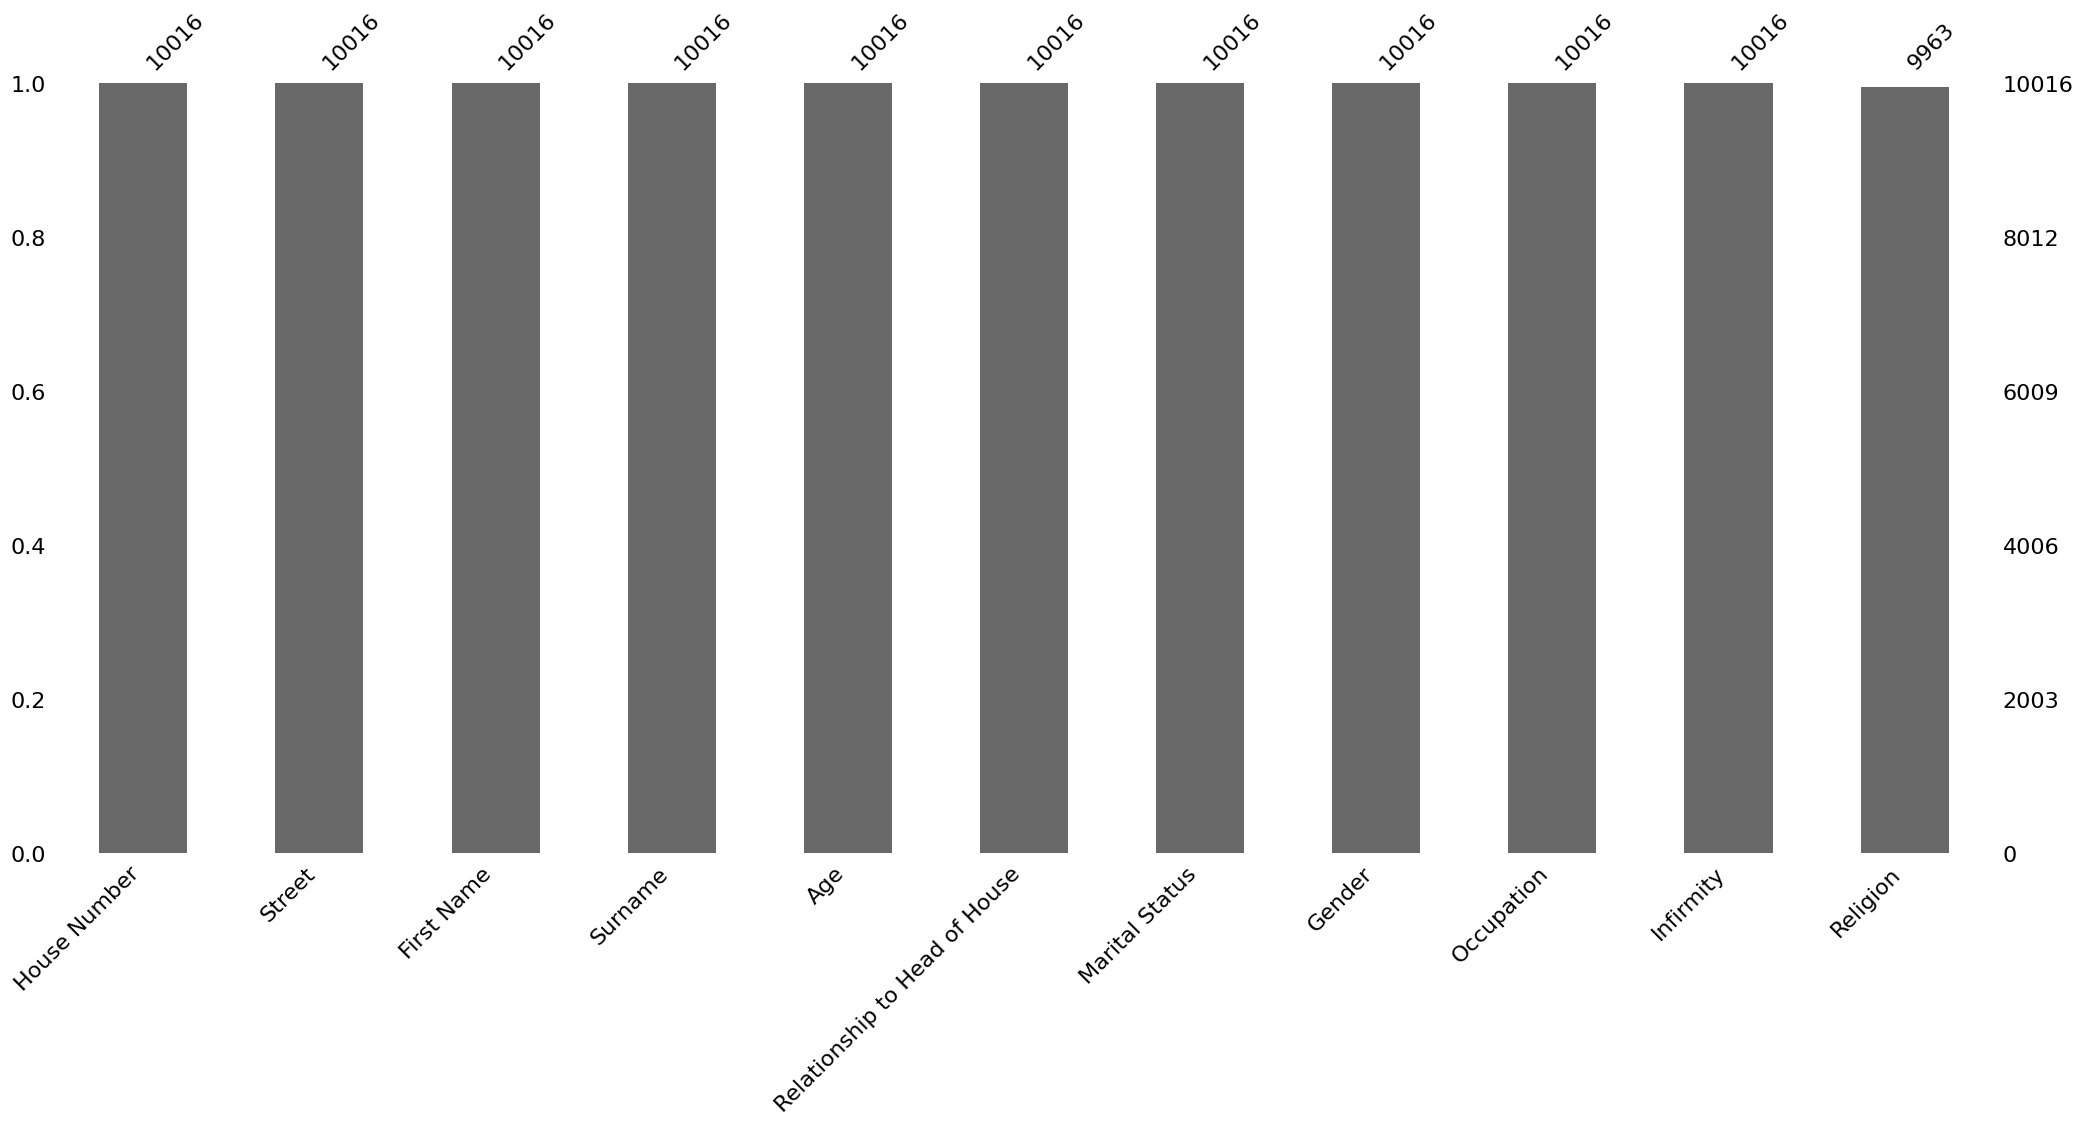

In [105]:
#Showing two columns marital status and religion Before cleaning data
missing_number_bar_plot=msno.bar(df)

# 2.2 Column "AgePyramid"

In [106]:
#fill created column with appropriate value using Age categories
for line, item in enumerate(df['Age']):
    if item in range(5):
        df.loc[line, 'Age Range'] = '0-4'
        df.loc[line, 'Age Order'] = 1
    elif item in range(5, 10):
        df.loc[line, 'Age Range'] = '5-9'
        df.loc[line, 'Age Order'] = 2
    elif item in range (10, 15):
        df.loc[line, 'Age Range'] = '10-14'
        df.loc[line, 'Age Order'] = 3
    elif item in range (15, 20):
        df.loc[line, 'Age Range'] = '15-19'
        df.loc[line, 'Age Order'] = 4
    elif item in range (20, 25):
        df.loc[line, 'Age Range'] = '20-24'
        df.loc[line, 'Age Order'] = 5
    elif item in range (25, 30):
        df.loc[line, 'Age Range'] = '25-29'
        df.loc[line, 'Age Order'] = 6
    elif item in range (30, 35):
        df.loc[line, 'Age Range'] = '30-34'
        df.loc[line, 'Age Order'] = 7
    elif item in range (35, 40):
        df.loc[line, 'Age Range'] = '35-39'
        df.loc[line, 'Age Order'] = 8
    elif item in range (40, 45):
        df.at[line, 'Age Range'] = '40-44'
        df.loc[line, 'Age Order'] = 9
    elif item in range (45, 50):
        df.loc[line, 'Age Range'] = '45-49'
        df.loc[line, 'Age Order'] = 10
    elif item in range(50, 55):
        df.loc[line, 'Age Range'] = '50-54'
        df.loc[line, 'Age Order'] = 11
    elif item in range (55, 60):
        df.loc[line, 'Age Range'] = '55-59'
        df.loc[line, 'Age Order'] = 12
    elif item in range (60, 65):
        df.loc[line, 'Age Range'] = '60-64'
        df.loc[line, 'Age Order'] = 13
    elif item in range (65, 70):
        df.loc[line, 'Age Range'] = '65-69'
        df.loc[line, 'Age Order'] = 14
    elif item in range (70, 75):
        df.loc[line, 'Age Range'] = '70-74'
        df.loc[line, 'Age Order'] = 15
    elif item in range (75, 80):
        df.loc[line, 'Age Range'] = '75-79'
        df.loc[line, 'Age Order'] = 16
    elif item in range (80, 85):
        df.loc[line, 'Age Range'] = '80-84'
        df.loc[line, 'Age Order'] = 17
    elif item in range (85, 90):
        df.loc[line, 'Age Range'] = '85-89'
        df.loc[line, 'Age Order'] = 18
    elif item in range (90, 95):
        df.loc[line, 'Age Range'] = '90-94'
        df.loc[line, 'Age Order'] = 19
    elif item in range (95, 100):
        df.loc[line, 'Age Range'] = '95-99'
        df.loc[line, 'Age Order'] = 20
    else:
        df.loc[line, 'Age Range'] = '100+'
        df.loc[line, 'Age Order'] = 21

In [107]:
df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Range,Age Order
0,1,Edwards Creek,Kyle,Davis,47,Head,Married,Male,Unemployed,None,Catholic,45-49,10.0
1,1,Edwards Creek,Alexandra,Davis,49,Wife,Married,Female,"Conservation officer, historic buildings",None,Catholic,45-49,10.0
2,1,Edwards Creek,Michael,Davis,20,Son,Single,Male,University Student,None,None,20-24,5.0
3,1,Edwards Creek,Malcolm,Davis,16,Son,Minor,Male,Student,None,Undecided,15-19,4.0
4,2,Edwards Creek,Claire,Humphries,40,Head,Married,Female,"Engineer, manufacturing",None,Christian,40-44,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10011,1,Rice House,Richard,Walters,40,Head,Single,Male,Chiropractor,None,Christian,40-44,9.0
10012,1,Rice House,Jade,Barry,38,Partner,Single,Female,Data processing manager,None,Christian,35-39,8.0
10013,1,Rice House,Jessica,Walters,0,Daughter,Minor,Female,Child,None,Undecided,0-4,1.0
10014,1,Rice House,Sean,George,22,Lodger,Single,Male,University Student,None,None,20-24,5.0


In [108]:
# Sort dataframe by Age Group and remove unneccesary column
df = df.sort_values('Age Order')
df.drop('Age Order', axis=1, inplace=True)

In [109]:
ageClass = ['100+','95-99','90-94','85-89','80-84','75-79','70-74','65-69',
            '60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

In [110]:
male_df = df.loc[df['Gender'].isin(['Male'])]

In [111]:
male_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Range
6317,40,Narwhal Avenue,Damien,Roberts,2,Son,Minor,Male,Child,None,Undecided,0-4
1478,154,Dennis Corners,Paul,McCarthy,1,Son,Minor,Male,Child,None,Undecided,0-4
2561,6,Holyrood Causeway,Bernard,Cunningham,0,Son,Minor,Male,Child,None,Undecided,0-4
7152,33,Smith Drive,Anthony,Howells,3,Son,Minor,Male,Child,None,Undecided,0-4
6766,122,Chan Port,Victor,Fox,3,Son,Minor,Male,Child,Mental Disability,Undecided,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...
9132,28,Jarvis Station,Shaun,Gill,102,Head,Married,Male,Retired,None,Christian,100+
7421,25,Tegid Avenue,Conor,Watkins,107,Husband,Married,Male,Retired,None,Christian,100+
7825,86,Duchess Harbor,Richard,Cox,101,Head,Widowed,Male,Retired,None,Methodist,100+
619,3,Baker Lane,Gregory,Johnson,102,Husband,Married,Male,Retired,None,None,100+


In [112]:
female_df = df.loc[df['Gender'].isin(['Female'])]

In [113]:
female_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Range
2751,6,Howell Rapid,Molly,Wyatt,2,Daughter,Minor,Female,Child,None,Undecided,0-4
6316,40,Narwhal Avenue,Laura,Roberts,2,Daughter,Minor,Female,Child,None,Undecided,0-4
2572,8,Holyrood Causeway,Jacqueline,Begum,3,Daughter,Minor,Female,Child,None,Undecided,0-4
7169,3,George Street,Laura,Hyde-Reid,3,Daughter,Minor,Female,Child,None,Undecided,0-4
9801,87,York Lane,Chelsea,Price-Harvey,0,Daughter,Minor,Female,Child,None,Undecided,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...
2380,14,Libra Street,Rachael,Patel,100,Head,Widowed,Female,Retired,None,Catholic,100+
5295,130,Dove Harbor,Catherine,Oliver,104,Head,Divorced,Female,Retired,None,Methodist,100+
2677,19,Copper Stravenue,Abigail,Green,100,Head,Widowed,Female,Retired,None,Christian,100+
7420,25,Tegid Avenue,Megan,Watkins,104,Head,Married,Female,Retired,None,Christian,100+


In [114]:
joint_gender = pd.DataFrame({'Age Range':df['Age Range'].unique()})

In [115]:
joint_gender

,Age Range
0,0-4
1,5-9
2,10-14
3,15-19
4,20-24
5,25-29
6,30-34
7,35-39
8,40-44
9,45-49


In [116]:
male_age_data = male_df['Age Range'].value_counts()

In [117]:
male_age_data

35-39    385
40-44    382
15-19    371
10-14    364
20-24    349
30-34    329
45-49    319
5-9      314
25-29    285
50-54    277
55-59    277
0-4      229
60-64    213
65-69    163
70-74    154
75-79    101
80-84     84
85-89     54
90-94     11
100+      10
95-99      8
Name: Age Range, dtype: int64

In [118]:
female_age_data = female_df['Age Range'].value_counts()

In [119]:
female_age_data

35-39    481
40-44    465
50-54    397
15-19    397
30-34    393
20-24    383
45-49    381
25-29    377
10-14    314
5-9      309
55-59    293
0-4      282
60-64    215
65-69    190
70-74    185
75-79    108
80-84     88
85-89     48
90-94     13
100+      11
95-99      7
Name: Age Range, dtype: int64

In [120]:
# Create column in joint_gender from male_age_data using 'Age Group' column
for item in list(male_age_data.index): #convert male_age_data index to list
    idx = joint_gender.index[joint_gender['Age Range'] == item].tolist() #Get the index of the row where Age Group matches
    joint_gender.loc[idx,'Male'] = male_age_data[item] # Assign value

In [121]:
# Create column in joint_gender from female_age_data using 'Age Group' column
for item in list(female_age_data.index): #convert female_age_data index to list
    idx1 = joint_gender.index[joint_gender['Age Range'] == item].tolist() #Get the index of the row where Age Group matches
    joint_gender.loc[idx1,'Female'] = female_age_data[item] # Assign value

In [122]:
joint_gender['Male'] = joint_gender['Male'] * (-1)

[Text(0.5, 0, 'Population'), Text(0, 0.5, 'Age Range')]

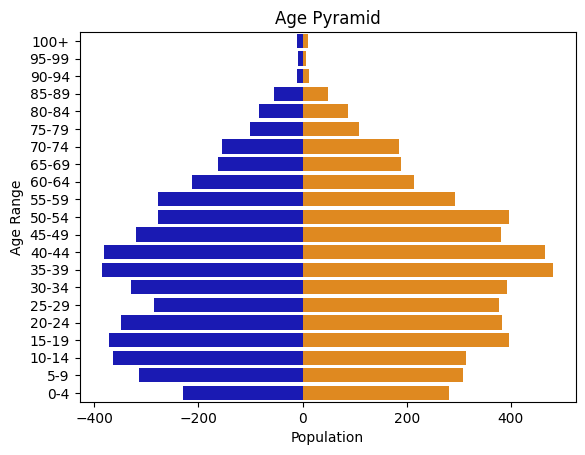

In [123]:
Age_Pyramid_population_Plot = sns.barplot(x='Male', y='Age Range', data=joint_gender, order=ageClass, color=('mediumblue'))

Age_Pyramid_population_Plot = sns.barplot(x='Female', y='Age Range', data=joint_gender, order=ageClass, color=('darkorange'))

# age_pyramid.set(xlabel="Population", ylabel="Age-Group")
plt.title('Age Pyramid')
Age_Pyramid_population_Plot.set(xlabel='Population', ylabel='Age Range')

# 2.3 Column "Gender"

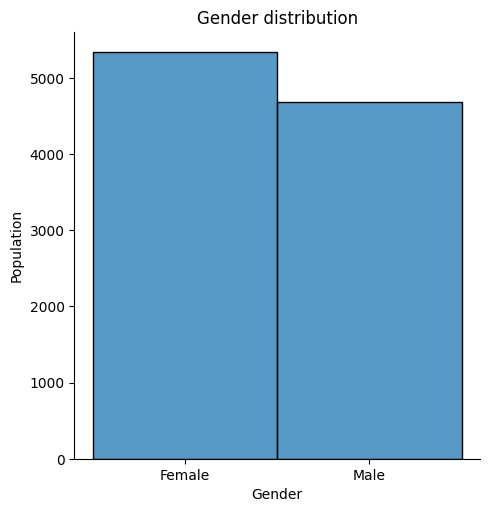

In [124]:
#Ploting displot for Gender data
#Plot shows the gender distribution within population
Gender_population_Plot= sns.displot(df['Gender']) #Plot shows the gender distribution within population
Gender_population_Plot.set(xlabel="Gender", ylabel="Population", title = "Gender distribution")

In [125]:
#Counting gender values with genderwise in Gender column
df['Gender'].value_counts()

Female    5337
Male      4679
Name: Gender, dtype: int64

In [126]:
#Counting total gender values in Gender column
df['Gender'].count()

10016

In [127]:
#Percentage of each gender population
round(df['Gender'].value_counts(normalize = True) *100, 2)

Female    53.28
Male      46.72
Name: Gender, dtype: float64

# 2.4 Column "Age"

In [128]:
#Getting description of Age column with 2 decimal place
round(df['Age'].describe(),2)

count    10016.00
mean        37.04
std         21.88
min          0.00
25%         19.00
50%         36.00
75%         52.00
max        107.00
Name: Age, dtype: float64

[Text(0.5, 0, 'Age Group'), Text(0, 0.5, 'Number of People')]

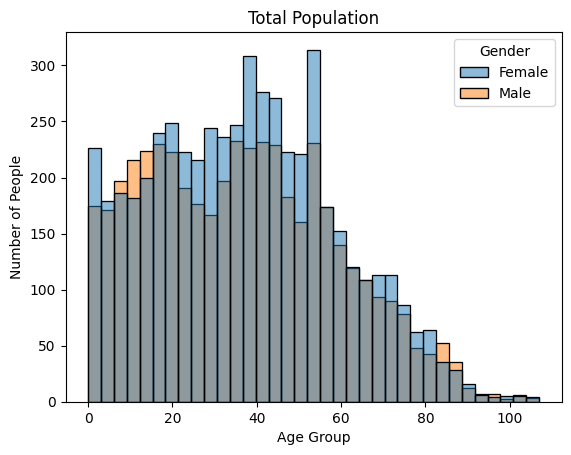

In [129]:
#Ploting Gender population and labelling it with title, x-axis, y-axis
Population_age_Plot= sns.histplot(data=df, x='Age', hue='Gender')
plt.title('Total Population')
Population_age_Plot.set(xlabel='Age Group', ylabel='Number of People')

In [130]:
#Assiging Male population to a variable Male
Male=df[df['Gender']=='Female']

In [131]:
#Assiging Female population to a variable Female
Female=df[df['Gender']=='Male']

[Text(0.5, 0, 'Age Group'), Text(0, 0.5, 'Number of Males')]

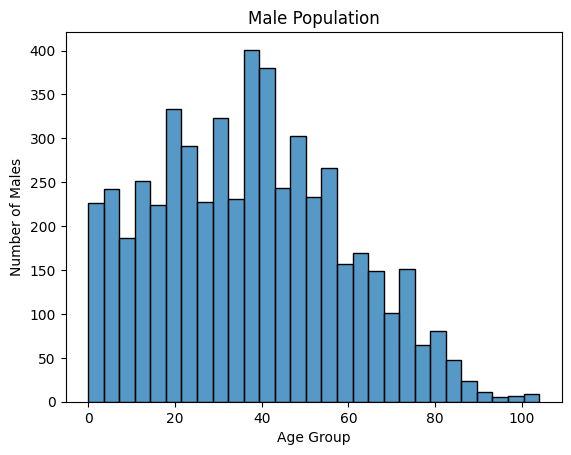

In [132]:
#Ploting Male population and labelling it with title, x-axis, y-axis
Male_Population_age_Plot= sns.histplot(data=Male, x='Age')
plt.title('Male Population')
Male_Population_age_Plot.set(xlabel='Age Group', ylabel='Number of Males')

[Text(0.5, 0, 'Age Group'), Text(0, 0.5, 'Number of Females')]

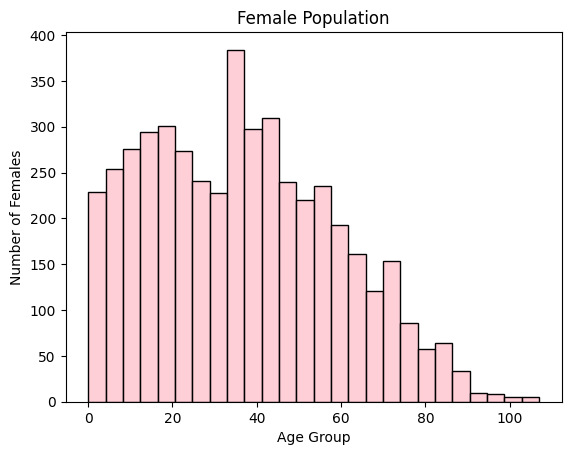

In [133]:
#Ploting Gender population and labelling it with title, x-axis, y-axis
Female_Population_age_Plot= sns.histplot(data=Female, x='Age', color = 'Pink')
plt.title('Female Population')
Female_Population_age_Plot.set(xlabel='Age Group', ylabel='Number of Females')

# 2.5 Column "Marital Status"

[Text(0.5, 0, 'Marital Status'),
 Text(0, 0.5, 'Population'),
 Text(0.5, 1.0, 'Marital Status')]

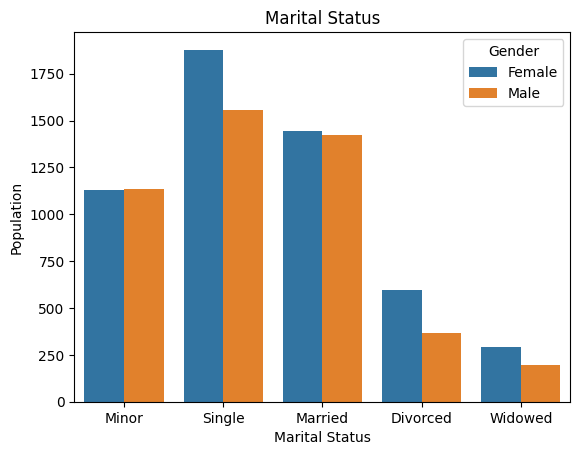

In [134]:
#Ploting counplot for marital status and setting an order of marital status on a plot
Marital_Status_Age_Plot=sns.countplot(data=df, x='Marital Status', hue='Gender', order=['Minor', 'Single', 'Married', 'Divorced', 'Widowed'])
Marital_Status_Age_Plot.set(xlabel="Marital Status", ylabel="Population", title = "Marital Status")

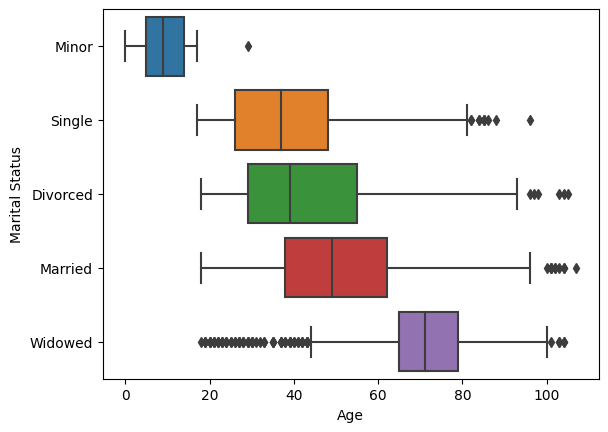

In [135]:
#Ploting boxplot for marital status and setting an order of marital status on a plot
Marital_Status_Age_Plot=sns.boxplot(data=df, y='Marital Status', x='Age')

In [136]:
#Counting values for each marital catagory for people over 18 years of age
df[df['Age'] > 18]['Marital Status'].value_counts()

Single      3298
Married     2868
Divorced     938
Widowed      485
Minor          1
Name: Marital Status, dtype: int64

In [137]:
#Counting and rounding off values to two decimal places for each marital catagory for people under 18 years of age
round(df[df['Age'] < 18]['Marital Status'].value_counts(normalize = True) * 100,2)

Minor     99.96
Single     0.04
Name: Marital Status, dtype: float64

In [138]:
#Calculating percentage and rounding off results to two decimal places for each marital catagory for people over 18 years of age
round(df[df['Age'] > 18]['Marital Status'].value_counts(normalize = True) * 100,2)

Single      43.45
Married     37.79
Divorced    12.36
Widowed      6.39
Minor        0.01
Name: Marital Status, dtype: float64

In [139]:
#Calculating percentage and rounding off results to two decimal places for each marital catagory for the whole population
round(df['Marital Status'].value_counts(normalize = True)* 100,2)

Single      34.28
Married     28.64
Minor       22.61
Divorced     9.61
Widowed      4.85
Name: Marital Status, dtype: float64

In [140]:
df_Male_Marriages=len(df[(df['Marital Status']=='Married') & (df['Gender']=='Male')])
print('Number of Male Marriages are', df_Male_Marriages)

df_Female_Marriages=len(df[(df['Marital Status']=='Married') & (df['Gender']=='Female')])
print('Number of Female Marriages are', df_Female_Marriages)

Number of Male Marriages are 1425
Number of Female Marriages are 1444


In [141]:
df_Female_divorces = len(df[(df['Marital Status']=='Divorced') & (df['Gender']=='Female')])
print('Number of Female Divorces are', df_Female_divorces)
                    
df_Male_divorces=len(df[(df['Marital Status']=='Divorced') & (df['Gender']=='Male')])
print('Number of Male Divorces are', df_Male_divorces)

Number of Female Divorces are 594
Number of Male Divorces are 369


In [142]:
#Assigning Married status for married to df_married and divorced df_divorced
df_Married = df[df['Marital Status'] == 'Married']
df_Divorced = df[df['Marital Status'] == 'Divorced']

In [143]:
#Calculating Marriage to Divorce Ratio per total marriages
Marriages_to_Divorce_Ratio=round(len(df_Married)/len(df_Divorced),2)
Marriages_to_Divorce_Ratio

2.98

[Text(0.5, 0, 'Age Group'), Text(0, 0.5, 'Number of Marriage')]

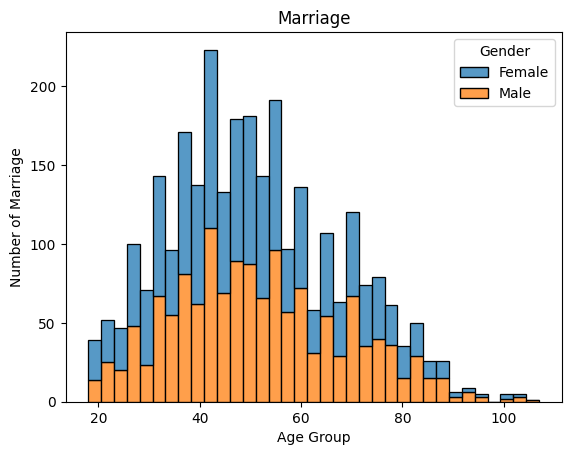

In [144]:
#Ploting hisplot for Married status and labelling it with title, x-axis and y-axis
Marriage_age_Plot=sns.histplot(data=df_Married, x='Age', hue='Gender', bins=35, multiple='stack')

plt.title('Marriage')
Marriage_age_Plot.set(xlabel='Age Group', ylabel='Number of Marriage')

[Text(0.5, 0, 'Age Group'), Text(0, 0.5, 'Number of Divorced')]

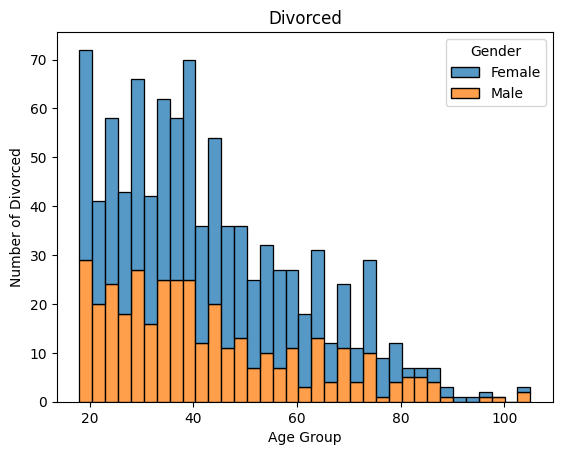

In [145]:
#Ploting hisplot for Divorced status and labelling it with title, x-axis and y-axis
Divorced_age_Plot=sns.histplot(data=df_Divorced, x='Age', hue='Gender', bins=35, multiple='stack')
plt.title('Divorced')
Divorced_age_Plot.set(xlabel='Age Group', ylabel='Number of Divorced')

In [146]:
Number_of_marriages= df[df['Marital Status'] == 'Married'].count()
Number_of_Divorce=df[df['Marital Status'] == 'Divorced'].count()

In [147]:
#Showing number of Marriages in a data
Number_of_marriages

House Number                     2869
Street                           2869
First Name                       2869
Surname                          2869
Age                              2869
Relationship to Head of House    2869
Marital Status                   2869
Gender                           2869
Occupation                       2869
Infirmity                        2869
Religion                         2865
Age Range                        2869
dtype: int64

In [148]:
#Showing number of Divorces in a data
Number_of_Divorce

House Number                     963
Street                           963
First Name                       963
Surname                          963
Age                              963
Relationship to Head of House    963
Marital Status                   963
Gender                           963
Occupation                       963
Infirmity                        963
Religion                         954
Age Range                        963
dtype: int64

In [149]:
#Calculating and rounding off a Marriage rate to two decimal places for number for Marriages in a data
Marriage_Rate=round((Number_of_marriages/Total_Population) *1000,2)

In [150]:
Marriage_Rate

House Number                     286.44
Street                           286.44
First Name                       286.44
Surname                          286.44
Age                              286.44
Relationship to Head of House    286.44
Marital Status                   286.44
Gender                           286.44
Occupation                       286.44
Infirmity                        286.44
Religion                         286.04
Age Range                        286.44
dtype: float64

In [151]:
#Calculating Divorce rate number for Marriages in a data
Divorce_Rate=round((Number_of_Divorce/Total_Population) *1000,2)

In [152]:
Divorce_Rate

House Number                     96.15
Street                           96.15
First Name                       96.15
Surname                          96.15
Age                              96.15
Relationship to Head of House    96.15
Marital Status                   96.15
Gender                           96.15
Occupation                       96.15
Infirmity                        96.15
Religion                         95.25
Age Range                        96.15
dtype: float64

# 2.6 Column "Religion"

In [153]:
#total number of vaues in each category under the heading religion
df['Religion'].value_counts()

None         3246
Christian    2326
Undecided    2267
Catholic     1095
Methodist     733
Muslim        146
Sikh           84
Jewish         55
Agnostic        6
Bahai           2
Buddist         2
Pagan           1
Name: Religion, dtype: int64

In [154]:
#Checking unique values in a Religion column
df['Religion'].unique()

array(['Undecided', 'None', 'Christian', nan, 'Muslim', 'Catholic',
       'Methodist', 'Sikh', 'Bahai', 'Jewish', 'Pagan', 'Buddist',
       'Agnostic'], dtype=object)

In [155]:
#Percentage of each religion under a column
round(df['Religion'].value_counts(normalize = True) * 100)

None         33.0
Christian    23.0
Undecided    23.0
Catholic     11.0
Methodist     7.0
Muslim        1.0
Sikh          1.0
Jewish        1.0
Agnostic      0.0
Bahai         0.0
Buddist       0.0
Pagan         0.0
Name: Religion, dtype: float64

In [156]:
#Percentage of each religion
Religion_Percentage=round(df[df['Religion'] != 'NA']['Religion'].value_counts(normalize = True) * 100,2)
Religion_Percentage

None         32.58
Christian    23.35
Undecided    22.75
Catholic     10.99
Methodist     7.36
Muslim        1.47
Sikh          0.84
Jewish        0.55
Agnostic      0.06
Bahai         0.02
Buddist       0.02
Pagan         0.01
Name: Religion, dtype: float64

[Text(0.5, 0, 'Population'),
 Text(0, 0.5, 'Religions'),
 Text(0.5, 1.0, 'Religion')]

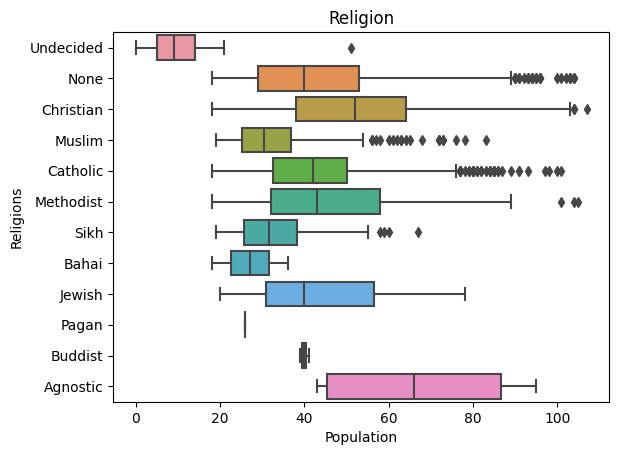

In [157]:
#Religion Distribution by Age
religion_affiliation_age_plot= sns.boxplot(data = df, x = 'Age', y = 'Religion')
religion_affiliation_age_plot.set(title = 'Religion Distribution')
religion_affiliation_age_plot.set(xlabel="Population", ylabel="Religions", title = "Religion")

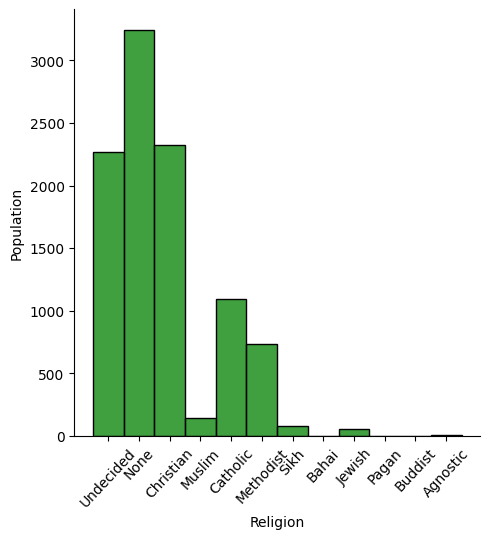

In [158]:
#Ploting displot for religion and labelling it with title, x-axis and y-axis 
Religion_Population_Plot= sns.displot(data = df, x = df['Religion'], color = 'Green')
Religion_Population_Plot.set_xticklabels(rotation=47)
Religion_Population_Plot.set(xlabel="Religion", ylabel="Population")

In [159]:
#Calculating religion mean
Religion_mean=round(df[(df['Religion']=='Christian')]['Age'].mean())
Religion_mean

51

In [160]:
#Calculating christian population in a religion
sum_christians=df[(df['Religion']=='Christian')].value_counts().sum()
sum_christians

2326

In [161]:
#Calculating young population in a christian religion
young_christians=df[(df['Religion']=='Christian') & (df['Age']>=18) & (df['Age']<=35)].value_counts().sum()
young_christians

501

Christian Religion is growing

# 2.7 Column "Infirmity"

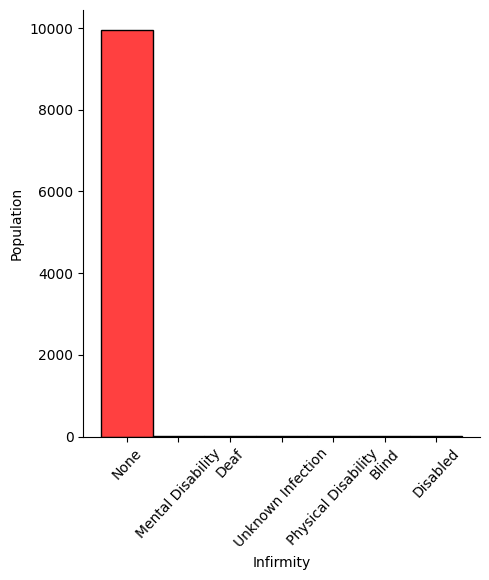

In [162]:
#Ploting displot for infirmity and labelling iy with title, x-axis and y-axis
Infirmity_population_Plot= sns.displot(data = df, x = df['Infirmity'], color = 'Red')
Infirmity_population_Plot.set(xlabel="Infirmity", ylabel="Population")
Infirmity_population_Plot.set_xticklabels(rotation=47)
Infirmity_population_Plot.savefig('Infirmity.png')

In [163]:
#Checking infirmity values for each catagory in infirmity column
df['Infirmity'].value_counts()

None                   9944
Physical Disability      21
Blind                    18
Mental Disability        11
Deaf                      8
Disabled                  8
Unknown Infection         6
Name: Infirmity, dtype: int64

In [164]:
#Checking infirmity Percentage for each catagory in infirmity column to two decimal places
Infirmity_Percentage=round((df['Infirmity'].value_counts(normalize = True) *100),2)
Infirmity_Percentage

None                   99.28
Physical Disability     0.21
Blind                   0.18
Mental Disability       0.11
Deaf                    0.08
Disabled                0.08
Unknown Infection       0.06
Name: Infirmity, dtype: float64

# 2.8 Column "Relationship to Head of House"

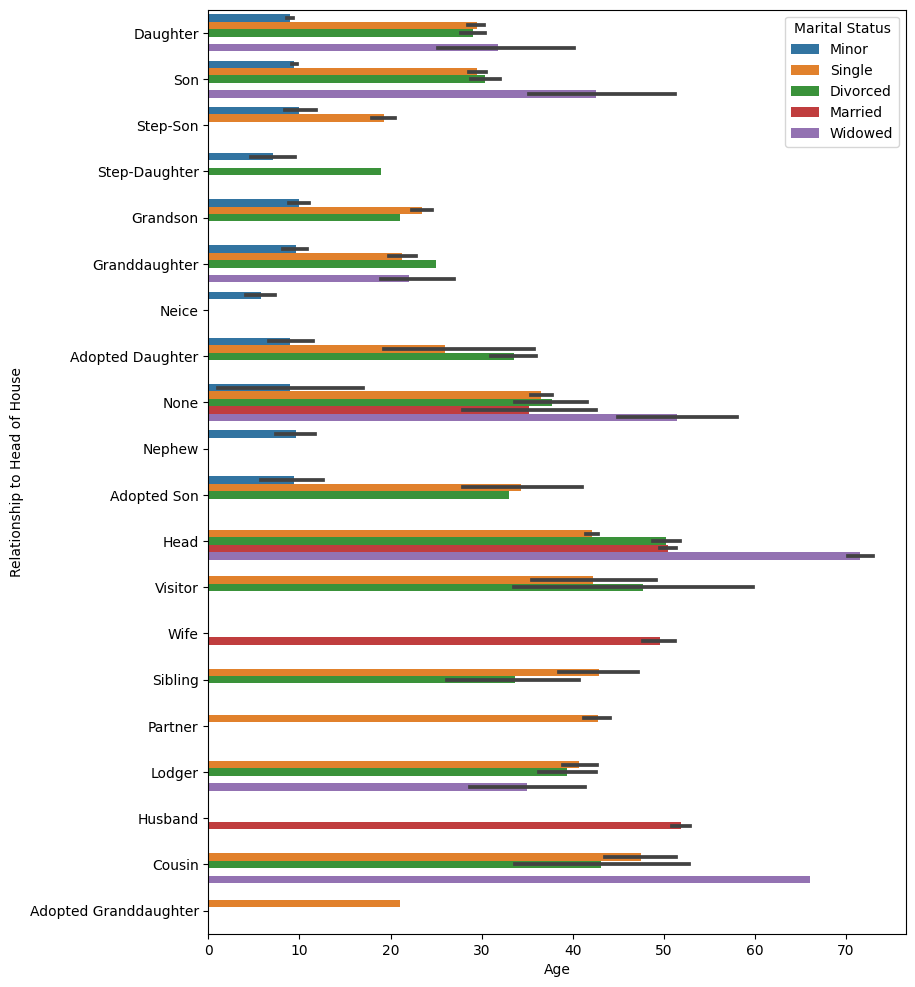

In [165]:
#Ploting subplots for a column
Plot_visibility=plt.subplots(figsize=(9, 12))
Relationship_to_Head_of_House_age_Plot=sns.barplot(data=df, y='Relationship to Head of House', x='Age', hue='Marital Status')

# 2.9 Column "Occupation"

In [166]:
#Catagorising all catagories of Occupations into six catagories and creating a new column in data frame
df['Occupation_Status'] = ['University Student' if i == 'PhD Student' else i for i in df['Occupation']]
df['Occupation_Status'] = ['Retired' if 'Retired' in str(i) else i for i in df['Occupation']]
df['Occupation_Status'] = [i if i in(['Child', 'Student','University Student' ,'Unemployed', 'Retired']) else 'Employed' for i in df['Occupation']]
df['Occupation_Status'].unique()

array(['Child', 'Student', 'University Student', 'Employed', 'Unemployed',
       'Retired'], dtype=object)

In [167]:
df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Range,Occupation_Status
2751,6,Howell Rapid,Molly,Wyatt,2,Daughter,Minor,Female,Child,None,Undecided,0-4,Child
6317,40,Narwhal Avenue,Damien,Roberts,2,Son,Minor,Male,Child,None,Undecided,0-4,Child
6316,40,Narwhal Avenue,Laura,Roberts,2,Daughter,Minor,Female,Child,None,Undecided,0-4,Child
2572,8,Holyrood Causeway,Jacqueline,Begum,3,Daughter,Minor,Female,Child,None,Undecided,0-4,Child
1478,154,Dennis Corners,Paul,McCarthy,1,Son,Minor,Male,Child,None,Undecided,0-4,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,3,Baker Lane,Gregory,Johnson,102,Husband,Married,Male,Retired,None,None,100+,Retired
2677,19,Copper Stravenue,Abigail,Green,100,Head,Widowed,Female,Retired,None,Christian,100+,Retired
7420,25,Tegid Avenue,Megan,Watkins,104,Head,Married,Female,Retired,None,Christian,100+,Retired
9133,28,Jarvis Station,Samantha,Gill,103,Wife,Married,Female,Retired,None,None,100+,Retired


In [168]:
#Calculating percentage of Occupation and rounding off results with two decimal places
Occupation_status=round((df['Occupation_Status'].value_counts(normalize = True) *100),2)
Occupation_status

Employed              51.97
Student               18.77
Retired               12.33
University Student     6.04
Unemployed             5.79
Child                  5.10
Name: Occupation_Status, dtype: float64

In [169]:
#Checking values of all catories in a new column namely occuption status
df['Occupation_Status'].value_counts()

Employed              5205
Student               1880
Retired               1235
University Student     605
Unemployed             580
Child                  511
Name: Occupation_Status, dtype: int64

In [170]:
#Creating a variable Male_Employment and storing unemployed males into this variable
Male_unemployment=df[(df['Occupation_Status']=='Unemployed') & (df['Gender']=='Male')].count()
#Creating a variable Female_Employment and storing unemployed females into this variable
Female_unemployment=df[(df['Occupation_Status']=='Unemployed') & (df['Gender']=='Female')].count()

In [171]:
#Male Unemployment
Male_unemployment

House Number                     209
Street                           209
First Name                       209
Surname                          209
Age                              209
Relationship to Head of House    209
Marital Status                   209
Gender                           209
Occupation                       209
Infirmity                        209
Religion                         209
Age Range                        209
Occupation_Status                209
dtype: int64

In [172]:
#Female Unemployment
Female_unemployment

House Number                     371
Street                           371
First Name                       371
Surname                          371
Age                              371
Relationship to Head of House    371
Marital Status                   371
Gender                           371
Occupation                       371
Infirmity                        371
Religion                         371
Age Range                        371
Occupation_Status                371
dtype: int64

In [173]:
#Creating a variable namely working age population for eligibke labourforce and storing that data into this variable 
Work_age_population=df[(df['Age']>=16) & (df['Age']<=64)]
Work_age_population.count()

House Number                     6825
Street                           6825
First Name                       6825
Surname                          6825
Age                              6825
Relationship to Head of House    6825
Marital Status                   6825
Gender                           6825
Occupation                       6825
Infirmity                        6825
Religion                         6772
Age Range                        6825
Occupation_Status                6825
dtype: int64

In [174]:
Working_age_population=len(Work_age_population)

#Creating and Assigning unemployed population to newly created variable Unemployed people
Unemployed_people=len(df[df['Occupation_Status']=='Unemployed'])


#Creating and Assigning employed population to newly created variable employed people
Employed_people=len(df[df['Occupation_Status']=='Employed'])

In [175]:
#Creating a new variable, calculating working age percentage, rounding off to two decimal places and storing it to new variable
Working_age_population_percentage=round(((Working_age_population/Total_Population)*100),2)

In [176]:
Working_age_population_percentage

68.14

In [177]:
#Creating a new variable, calculating Unemployment percentage, rounding off to two decimal places and storing it to new variable
Unemployment_percentage=round(((Unemployed_people/Working_age_population)*100),2)

In [178]:
Unemployment_percentage

8.5

In [179]:
#Creating a new variable, calculating Unemployment rate, rounding off to two decimal places and storing it to new variable
Unemployment_rate=round((Unemployed_people/Employed_people),2)

In [180]:
Unemployment_rate

0.11

[Text(0.5, 0, 'Age Group'), Text(0, 0.5, 'Population')]

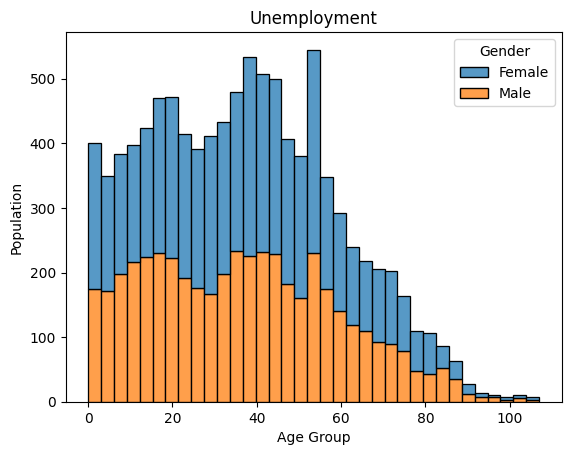

In [181]:
#Ploting histplot for umeployment data and labelling it with title, x-axis and y-axis
Unemployment_age_Plot=sns.histplot(data=Unemployed_people, x=df['Age'], hue=df['Gender'], bins=35, multiple='stack')
plt.title('Unemployment')
Unemployment_age_Plot.set(xlabel='Age Group', ylabel='Population')

[Text(0.5, 1.0, 'Occupation Distribution')]

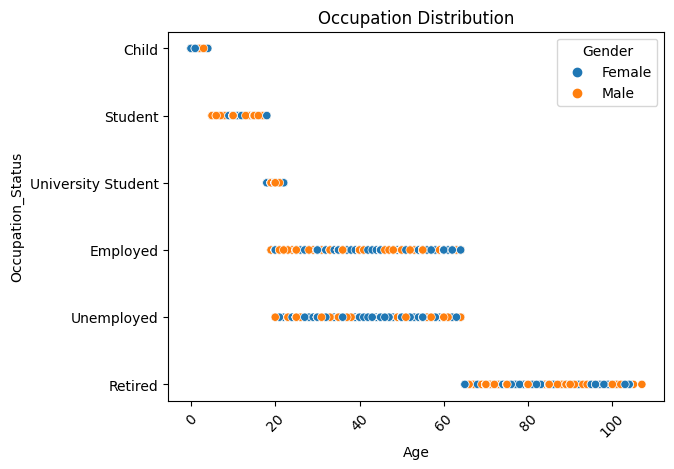

In [182]:
# Occupation distribution by age
Employment_age_Plot = sns.scatterplot(data = df, x = df['Age'], y = df['Occupation_Status'], hue = df['Gender'])
plt.xticks(rotation=45)
Employment_age_Plot.set(title = "Occupation Distribution")

# 3.0 Column "Household size and Occupancy"

[Text(0.5, 0, 'Population'),
 Text(0, 0.5, 'Number of Streets'),
 Text(0.5, 1.0, 'Street')]

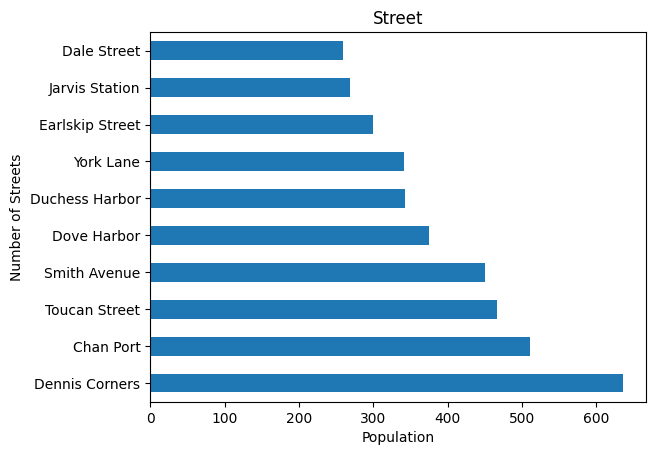

In [183]:
#ploting streets with occupancy
Streets_plot=df['Street'].value_counts().head(10).plot(kind='barh')
Streets_plot.set(xlabel="Population", ylabel="Number of Streets", title = "Street")

In [184]:
#Creating a dataframe size_house_street, grouping house number and street and storing that grouped data into new dataframe.
size_house_street=df.groupby('Street')['House Number'].nunique()

In [185]:
House_street=pd.DataFrame(size_house_street.sort_values(ascending=False)).reset_index()
House_street.columns=['Street', 'occupants']
House_street

,Street,occupants
0,Dove Harbor,240
1,Dennis Corners,203
2,Dale Street,166
3,Williamson Brooks,154
4,Chan Port,153
...,...,...
99,Smith House,1
100,Little Granary,1
101,Owens Institute,1
102,Saunders Rectory,1


In [186]:
house_street_count = df.groupby(['House Number', 'Street']).size().reset_index(name='number_of_occupants')
house_street_count

,House Number,Street,number_of_occupants
0,1,Aquarius Place,2
1,1,Baker Lane,19
2,1,Bank Avenue,2
3,1,Bell Spur,1
4,1,Brooks Ferry,1
...,...,...,...
3844,236,Dove Harbor,1
3845,237,Dove Harbor,1
3846,238,Dove Harbor,1
3847,239,Dove Harbor,3


In [187]:
#Calculating average occupany in houses
Mean_Occupancy = round((Total_Population/len(house_street_count)),2)
Mean_Occupancy

2.6

In [188]:
#Getting details about household and occupancy
house_street_count.count()

House Number           3849
Street                 3849
number_of_occupants    3849
dtype: int64

In [189]:
house_street_count.loc[house_street_count['number_of_occupants']==2.6, 'Occupancy Level']='Optimal'
house_street_count.loc[house_street_count['number_of_occupants'] >2.6, 'Occupancy Level']='Overused'
house_street_count.loc[house_street_count['number_of_occupants'] <2.6, 'Occupancy Level']='Underused'
house_street_count.count()

House Number           3849
Street                 3849
number_of_occupants    3849
Occupancy Level        3849
dtype: int64

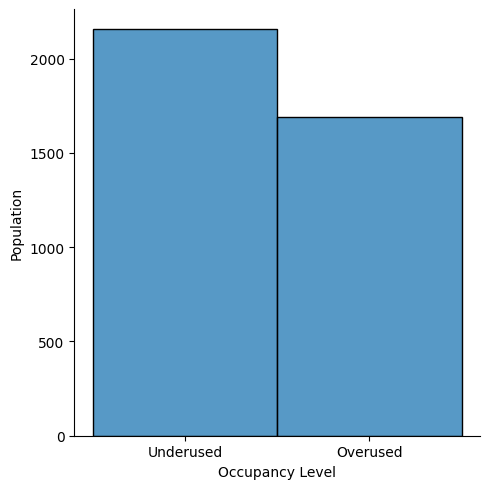

In [190]:
Household_Occupancy_Level_Plot=sns.displot(house_street_count, x= 'Occupancy Level')
Household_Occupancy_Level_Plot.set(xlabel="Occupancy Level", ylabel="Population")

# 3.1 Column "Commuters"

In [191]:
#To get commuters rate in a town
df['Gender'] = df['Gender'].astype('category')
Population = df['Marital Status'].value_counts().sum()
Lodger=df[(df['Relationship to Head of House']=='Lodger') & (df['Occupation_Status']=='Employed')]['Gender'].count()
Students_of_university = df[(df['Occupation_Status']=='University Student')]['Gender'].count()
Staff_of_university = df[(df['Occupation']=='Lecturer')|(df['Occupation']=='Further education lecturer')|(df['Occupation']=='Academic librarian')]['Gender'].count()
Number_of_Commuters=Lodger + Students_of_university + Staff_of_university

In [192]:
#students_of_Lodger_percentage  and rounding off results to two decimal places
Lodger_percentage=round((Lodger/Total_Population)*100,2)
Lodger_percentage

2.22

In [193]:
#students_of_students_of_university_percentage  and rounding off results to two decimal places
students_of_university_percentage=round((Students_of_university/Total_Population)*100,2)
students_of_university_percentage

6.04

In [194]:
#students_of_staff_of_university_percentage and rounding off results to two decimal places
staff_of_university_percentage=round((Staff_of_university/Total_Population)*100,2)
staff_of_university_percentage

0.11

In [195]:
#staff_of_university
Staff_of_university

11

In [196]:
#students_of_university
Students_of_university

605

In [197]:
#Number_of_Commuters_percentage and rounding off results to two decimal places
Number_of_Commuters_percentage=round((Number_of_Commuters/Total_Population)*100,2)
Number_of_Commuters_percentage

8.37

In [198]:
#Calculating rate of Commuters
Commuters_rate=round((Number_of_Commuters/3),2)
Commuters_rate

279.33

# 3.2 "Population Growth Analysis"

# 3.2.1 "Birth Rate"

In [199]:
#Calculating the birthrate per 1000 people
Child_Birth_age_0=len(df[df['Age'] == 0])
Child_Birth_age_4=len(df[df['Age'] == 4])

print('Number of children aged zero are', Child_Birth_age_0)
print('Number of children aged four are', Child_Birth_age_4)

Number of children aged zero are 86
Number of children aged four are 110


In [200]:
#Calculating Crude birthrate
Birth_rate_aged_0=round((Child_Birth_age_0/Total_Population)*1000)
Birth_rate_aged_0

9

In [201]:
#Calculating the last Crude birthrate
Birth_rate_aged_4=round((Child_Birth_age_4/Total_Population)*1000)
Birth_rate_aged_4

11

In [202]:
#Calculating the change in the Crude birthrates
percentage_change=round(((Birth_rate_aged_0 - Birth_rate_aged_4)/Birth_rate_aged_4)*100)
percentage_change

-18

In [203]:
#Calculating fertility rate of specific age groups
female_aged_25_29 = len(df[(df['Age'] >= 25) & (df['Age'] <= 29) & (df['Gender'] == 'Female')])
female_aged_30_34 = len(df[(df['Age'] >= 30) & (df['Age'] <= 34) & (df['Gender'] == 'Female')])

print('Number of Female aged 25 to 29 are', female_aged_25_29)
print('Number of Female aged 30 to 34 are', female_aged_30_34)

Number of Female aged 25 to 29 are 377
Number of Female aged 30 to 34 are 393


In [204]:
Fertility_rate_age_25_29=round((Child_Birth_age_0/female_aged_25_29)*1000)
print('Fertility rate of Female aged 25 to 29 is', Fertility_rate_age_25_29)

Fertility rate of Female aged 25 to 29 is 228


In [205]:
Fertility_rate_age_30_34=round((Child_Birth_age_4/female_aged_30_34)*1000)
print('Fertility rate of Female aged 30 to 34 is', Fertility_rate_age_30_34)

Fertility rate of Female aged 30 to 34 is 280


In [206]:
Fertility_rate=Fertility_rate_age_25_29 - Fertility_rate_age_30_34
print('Fertility rate of Females is', Fertility_rate)

Fertility rate of Females is -52


# 3.2.2 "Death Rate"

In [207]:
#Calculating the death rate with assumtion that numbers are same
age_range_56_60= len(df[(df['Age'] >= 56) & (df['Age'] <= 60)])
age_range_61_65= len(df[(df['Age'] >= 61) & (df['Age'] <= 65)])

print('Number of people aged 56 to 60 are', age_range_56_60)
print('Number of people aged 61 to 65 are', age_range_61_65)

Number of people aged 56 to 60 are 547
Number of people aged 61 to 65 are 410


In [208]:
#Deathrate per year group 1
death_rate_per_annum=round((age_range_56_60 - age_range_61_65)/5)
print('Death rate per annum', death_rate_per_annum)

Death rate per annum 27


In [209]:
age_range_66_70= len(df[(df['Age'] >= 66) & (df['Age'] <= 70)])
age_range_71_75= len(df[(df['Age'] >= 71) & (df['Age'] <= 75)])

print('Number of people aged 66 to 70 are', age_range_66_70)
print('Number of people aged 71 to 75 are', age_range_71_75)

Number of people aged 66 to 70 are 346
Number of people aged 71 to 75 are 318


In [210]:
#Deathrate per year group 2
death_rate_per_annum_2=round((age_range_61_65 - age_range_66_70)/5)
print('Death rate per annum.2 are', death_rate_per_annum_2)

Death rate per annum.2 are 13


In [211]:
#Calculating and repeating death rates for all age groups per year
all_age_groups=['0-5 & 6-10','11-15 & 15-20','21-25 & 25-30','31-35 & 36-40','41-45 & 46-50','51-55 & 56-60', '61-65 & 66-70', '71-75 & 76-80', '81-85 & 86-90', '91-95 & 96-100', '101-105 & 106-110']
set_1=[(0,5),(11,15),(21,25),(31,35),(41,45),(51,55),(61,65),(71,75),(81,85),(91,95),(100,105)]
set_2=[(6,10),(16,20),(26,30),(36,40),(46,50),(56,60),(66,70),(76,80),(86,90),(96,100),(106,110)]
all_age_set_1=[len(df[df['Age'].between(x[0],x[1])]) for x in set_1]
all_age_set_2=[len(df[df['Age'].between(x[0],x[1])]) for x in set_2]

print(all_age_set_1)
print(all_age_set_2)

[620, 672, 696, 729, 836, 664, 410, 318, 157, 22, 20]
[664, 789, 674, 890, 668, 547, 346, 196, 85, 15, 1]


In [212]:
print(len(all_age_groups))

11


In [213]:
#Creating new dataframes namely age_range, count_range_1 and count_range_2 and storing data for death rates in to this dataframe
death_rate_per_annum_3=pd.DataFrame({'Age_Range':all_age_groups,
 'count_range_1':all_age_set_1,
 'count_range_2':all_age_set_2 })
death_rate_per_annum_3

,Age_Range,count_range_1,count_range_2
0,0-5 & 6-10,620,664
1,11-15 & 15-20,672,789
2,21-25 & 25-30,696,674
3,31-35 & 36-40,729,890
4,41-45 & 46-50,836,668
5,51-55 & 56-60,664,547
6,61-65 & 66-70,410,346
7,71-75 & 76-80,318,196
8,81-85 & 86-90,157,85
9,91-95 & 96-100,22,15


In [214]:
#creating Dataframe death_rate_per_annum_3['Number of death'], calculating death rate and storing resuts into this DaTaframe 
death_rate_per_annum_3['Number of death']=death_rate_per_annum_3['count_range_1'] - death_rate_per_annum_3['count_range_2']
death_rate_per_annum_3['Death rate per annum']=death_rate_per_annum_3['Number of death']/5
death_rate_per_annum_3

,Age_Range,count_range_1,count_range_2,Number of death,Death rate per annum
0,0-5 & 6-10,620,664,-44,-8.8
1,11-15 & 15-20,672,789,-117,-23.4
2,21-25 & 25-30,696,674,22,4.4
3,31-35 & 36-40,729,890,-161,-32.2
4,41-45 & 46-50,836,668,168,33.6
5,51-55 & 56-60,664,547,117,23.4
6,61-65 & 66-70,410,346,64,12.8
7,71-75 & 76-80,318,196,122,24.4
8,81-85 & 86-90,157,85,72,14.4
9,91-95 & 96-100,22,15,7,1.4


In [215]:
death_rate=round((death_rate_per_annum_3['Number of death'].sum()/len(df))*1000,2)
death_rate

26.86

In [216]:
#trying and Repeating calculations for death rate for old age groups
all_age_group=['61-65 & 66-70', '71-75 & 76-80', '81-85 & 86-90', '91-95 & 96-100', '101-105 & 106-110']
set1=[(61,65),(71,75),(81,85),(91,95),(100,105)]
set2=[(66,70),(76,80),(86,90),(96,100),(106,110)]
all_age_set1=[len(df[df['Age'].between(x[0],x[1])]) for x in set1]
all_age_set2=[len(df[df['Age'].between(x[0],x[1])]) for x in set2]

print(all_age_set1)
print(all_age_set2)

[410, 318, 157, 22, 20]
[346, 196, 85, 15, 1]


In [217]:
#Creating new dataframes namely age_range, count_range1 and count_range2 and storing data for death rates in to this dataframe
death_rate_per_annum3=pd.DataFrame({'Age_Range':all_age_group,
 'count_range1':all_age_set1,
 'count_range2':all_age_set2 })
death_rate_per_annum3

,Age_Range,count_range1,count_range2
0,61-65 & 66-70,410,346
1,71-75 & 76-80,318,196
2,81-85 & 86-90,157,85
3,91-95 & 96-100,22,15
4,101-105 & 106-110,20,1


In [218]:
death_rate_per_annum3['Number of Death']=death_rate_per_annum3['count_range1'] - death_rate_per_annum3['count_range2']
death_rate_per_annum3['Death rate per annum']=death_rate_per_annum3['Number of Death']/5
death_rate_per_annum3

,Age_Range,count_range1,count_range2,Number of Death,Death rate per annum
0,61-65 & 66-70,410,346,64,12.8
1,71-75 & 76-80,318,196,122,24.4
2,81-85 & 86-90,157,85,72,14.4
3,91-95 & 96-100,22,15,7,1.4
4,101-105 & 106-110,20,1,19,3.8


In [219]:
Death_rate=round((death_rate_per_annum3['Number of Death'].sum()/len(df))*1000,2)
Death_rate

28.35

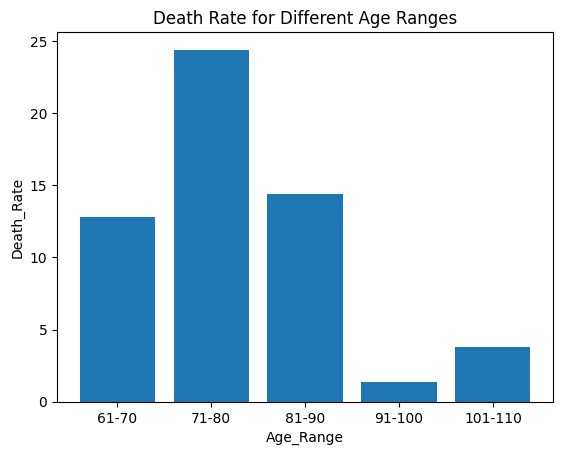

In [220]:
#Creating list of death rate
death_rates=[12.8, 24.4, 14.4, 1.4, 3.8]
Death_rate_age_plot=plt.bar(['61-70','71-80','81-90','91-100','101-110'], death_rates)
plt.xlabel('Age_Range')
plt.ylabel('Death_Rate')
plt.title('Death Rate for Different Age Ranges')
plt.show()

Population is shrinking

# 3.3 Migration

# 3.3.1 Emmigration

In [221]:
#Calculating Emmigration
Female_divorces = len(df[(df['Marital Status']=='Divorced') & (df['Gender']=='Female')])
print('Number of Female Divorces are', Female_divorces)
                    
Male_divorces=len(df[(df['Marital Status']=='Divorced') & (df['Gender']=='Male')])
print('Number of Male Divorces are', Male_divorces)

##Calculating Emmigration Rate
Emmigration_Rate=round(((Female_divorces - Male_divorces)/len(df))*1000,2)
print('The Emmigration rate is', Emmigration_Rate)

Number of Female Divorces are 594
Number of Male Divorces are 369
The Emmigration rate is 22.46


# 3.3.2 Immigration

In [222]:
#Calculating Immigration
Visitors= df[(df['Relationship to Head of House']== 'Visitor')]
print('The number of Visitors are:', len(Visitors))

Lodgers= df[(df['Relationship to Head of House']== 'Lodger')]
print('The number of Lodgers are:', len(Lodgers))

#Calculating Immigration rate
immigration_rate=round(((len(Visitors)+ len(Lodgers))/len(df))*1000,2)
print('The immigration rate is:', immigration_rate)

The number of Visitors are: 22
The number of Lodgers are: 268
The immigration rate is: 28.95


# 3.4 POPULATION DEMOGRAPHICS(post cleaning, analysis, visualisation and insights

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10016 entries, 2751 to 768
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   10016 non-null  int64   
 1   Street                         10016 non-null  object  
 2   First Name                     10016 non-null  object  
 3   Surname                        10016 non-null  object  
 4   Age                            10016 non-null  int32   
 5   Relationship to Head of House  10016 non-null  object  
 6   Marital Status                 10016 non-null  object  
 7   Gender                         10016 non-null  category
 8   Occupation                     10016 non-null  object  
 9   Infirmity                      10016 non-null  object  
 10  Religion                       9963 non-null   object  
 11  Age Range                      10016 non-null  object  
 12  Occupation_Status              

# Plots Save

In [224]:
#Saving all plots under their respective titles 
def SavePlots():
    Age_Pyramid_population_Plot.figure.savefig("Age_Pyramid_population_Plot.png")
    Marriage_age_Plot.figure.savefig("Marriage_age_Plot.png")
    Divorced_age_Plot.figure.savefig("Divorced_age_Plot.png")
    Religion_Population_Plot.figure.savefig("Religion_Population_Plot.png")
    Employment_age_Plot .figure.savefig("Employment_age_Plot .png")
    Unemployment_age_Plot.figure.savefig("Unemployement_age_group_Plot.png")
    Marital_Status_Age_Plot.figure.savefig("Marital_Status_Age_Plot.png")
    Female_Population_age_Plot.figure.savefig("Female_Population_age_Plot.png")
    Male_Population_age_Plot.figure.savefig("Male_Population_Plot.png")
    Gender_population_Plot.figure.savefig("Gender_Plot.png")
    Relationship_to_Head_of_House_age_Plot.figure.savefig("Relationship_to_Head_of_House_age_Plot.png")
    Population_age_Plot.figure.savefig("Population_age_Plot.png")
    religion_affiliation_age_plot.figure.savefig("religion_affiliation_age_plot.png")
    Infirmity_population_Plot.figure.savefig("Infirmity_population_Plot.png")
    missing_number_plot.figure.savefig("missing_number_plot.png")
    Streets_plot.figure.savefig("Streets_plot.png")
    Household_Occupancy_Level_Plot.figure.savefig("Household_Occupancy_Level_Plot.png")
    missing_number_bar_plot.figure.savefig("missing_number_bar_plot.png")
SavePlots()
plt.savefig("Death_rate_age_plot.png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>